<a href="https://colab.research.google.com/github/1heodora-e/fetal-health-ml-project/blob/main/Fetal_Health_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Software Engineering Summative: A Comparative Analysis of Machine Learning and Deep Learning Models for Fetal Health Classification**

**By Theodora Egbunike**

# **1. Introduction**

In this summative project, my goal is to implement and systematically compare two different paradigms for solving a multi-class classification problem: traditional machine learning models and deep learning models built from scratch. The chosen task is to classify the health status of a fetus (Normal, Suspect, or Pathological) based on features extracted from Cardiotocography (CTG) scans. The focus of this work is not just on building models, but on demonstrating a deep understanding of the end-to-end machine learning pipeline through a rigorous, experiment-driven comparison of the two perspectives.

# **2. Dataset Selection & Preprocessing**

**2.1. Dataset Justification**

I have chosen the "Fetal Health Classification" dataset from Kaggle, which originates from the UCI Machine Learning Repository. This dataset is excellent for this project because it addresses a meaningful, real-world clinical problem: providing an objective tool to aid in fetal health assessment. Unlike overly simplistic datasets, this one presents a realistic challenge with a significant class imbalance, which requires a more deliberate and thoughtful approach to preprocessing, model training, and evaluation. The dataset includes 21 features that were extracted from CTG scans and classified by expert obstetricians, making it a rich and reliable source for building a predictive model.

Citation: "Kaggle. Fetal Health Classification Dataset. Retrieved from https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification "

**2.2. Setup and Data**

Here, I handle the necessary setup for my Google Colab environment. I install the Kaggle library, configure the API token for authentication, and then download and unzip the Fetal Health Classification dataset directly into the environment. This ensures a clean and reproducible setup for my project.

In [ ]:
# 1. Install the Kaggle library
! pip install kaggle

# 2. Run this cell and upload your kaggle.json file
from google.colab import files
files.upload()

# 3. Make a directory for Kaggle and move the json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# 4. Download the dataset using the Kaggle API command
! kaggle datasets download -d andrewmvd/fetal-health-classification

# 5. Unzip the dataset
! unzip fetal-health-classification.zip

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
fetal-health-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fetal-health-classification.zip
replace fetal_health.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**2.3. Data Loading and Initial Inspection**

My first step was to load the dataset into a pandas DataFrame. I then performed an initial inspection to understand its structure, column types, and to identify any missing values. The .info() and .head() functions were invaluable for this, confirming that the dataset was clean, with no missing values, and that all features were numerical, simplifying the initial preprocessing steps.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots
sns.set_style('whitegrid')

# Load the dataset into a pandas DataFrame
df = pd.read_csv('fetal_health.csv')

# Perform your initial inspection
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

print("\nStatistical Summary:")
display(df.describe())

First 5 rows of the dataset:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_sh

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


**2.4. Exploratory Data Analysis (EDA)**

I'll begin my Exploratory Data Analysis by examining the distribution of the target variable, fetal_health. This is a critical first step to determine if the classes are balanced or imbalanced. Discovering a class imbalance early on is crucial as it will directly inform my choice of evaluation metrics and modeling strategies to ensure I build a fair and effective classifier.

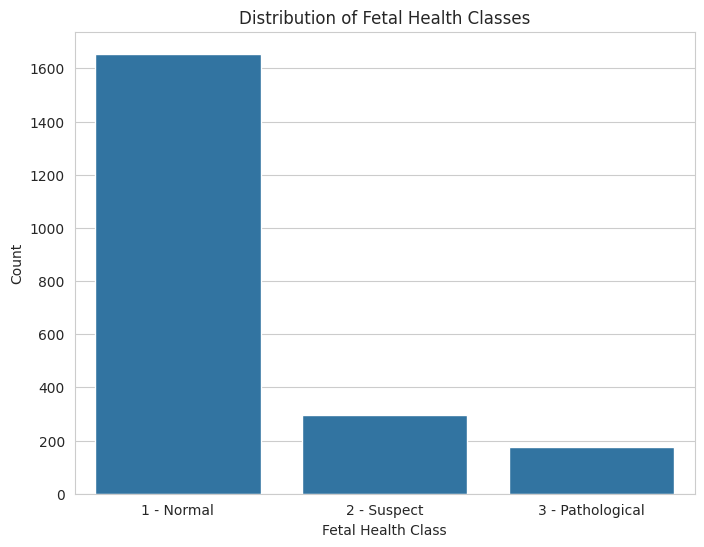

Class Counts:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


In [ ]:
# --- Exploratory Data Analysis (EDA) ---

# 1. Visualize the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=df)
plt.title('Distribution of Fetal Health Classes')
plt.xlabel('Fetal Health Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['1 - Normal', '2 - Suspect', '3 - Pathological'])
plt.show()

# Print the exact counts for each class
print("Class Counts:")
print(df['fetal_health'].value_counts())

**2.5. Feature Distribution Analysis**

Next, I'll analyze the distributions of some of the most clinically significant features to see how they differ across the three health classes. By creating box plots, I can visually inspect whether these features provide a strong signal for separating Normal, Suspect, and Pathological cases. This will help confirm which features are likely to be important predictors for my models.

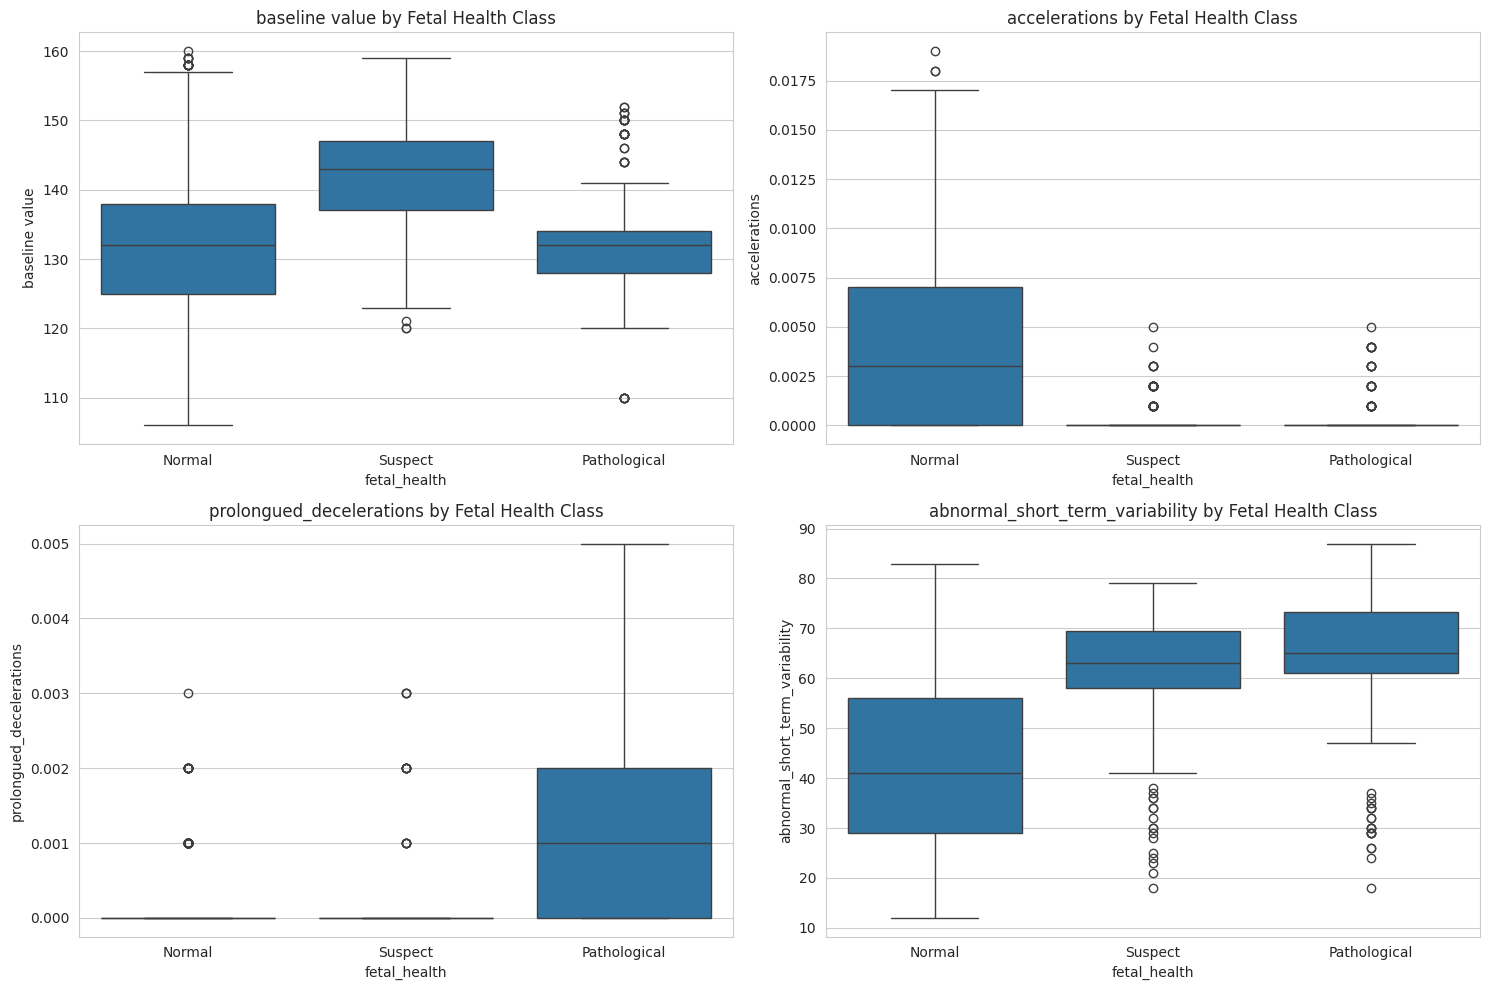

In [ ]:
# 2. Analyze key feature distributions across classes
key_features = ['baseline value', 'accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='fetal_health', y=feature, data=df)
    plt.title(f'{feature} by Fetal Health Class')
    plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])

plt.tight_layout()
plt.show()

**2.6. Data Preparation**

With the EDA complete, I will now prepare the data for the modeling phase. This involves separating the features from the target variable, splitting the data into training, validation, and test sets, and finally, scaling the features. I am using a stratified split to ensure the class imbalance is preserved across all sets, and I will fit the scaler only on the training data to prevent any data leakage from the validation or test sets into my training process.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Data Preparation ---

# 1. Separate features (X) and the target variable (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# 2. Split data into training (70%), validation (15%), and test (15%) sets
# First, split into 70% training and 30% temporary (for val/test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then, split the 30% temporary set in half to get 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Scale the features
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data to prevent data leakage
scaler.fit(X_train)

# Transform the training, validation, and test sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 4. Check the shapes of the new datasets
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_val:", X_val_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)

Shape of X_train: (1488, 21)
Shape of X_val: (319, 21)
Shape of X_test: (319, 21)


# **3. Traditional Machine Learning Models**

In this section, I will implement and evaluate two classical machine learning approaches: Random Forest and XGBoost. For each approach, I will conduct a series of three systematic experiments to establish a baseline, optimize performance, and explore variations.

**Approach 1: Random Forest Classifier**

The Random Forest is a powerful ensemble learning method that operates by constructing a multitude of decision trees at training time. It outputs the class that is the mode of the classes of the individual trees, making it robust to overfitting and effective on complex datasets.

**Experiment 1.1: Baseline Model**

My first experiment establishes a baseline performance for the Random Forest model using its default hyperparameters from the scikit-learn library. This provides a crucial benchmark against which I can measure the impact of my subsequent optimization efforts.

--- Random Forest: Baseline ---

Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       248
     Suspect       0.79      0.70      0.75        44
Pathological       0.89      0.93      0.91        27

    accuracy                           0.93       319
   macro avg       0.88      0.87      0.87       319
weighted avg       0.93      0.93      0.93       319


Confusion Matrix:


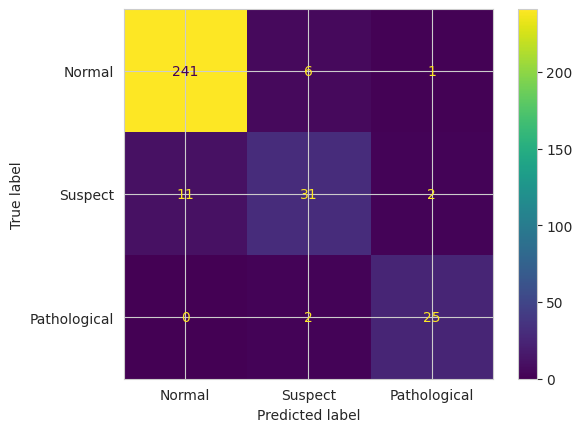

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Experiment 1.1: Random Forest Baseline ---

print("--- Random Forest: Baseline ---")

# 1. Initialize the model with a random_state for reproducibility
model_rf_baseline = RandomForestClassifier(random_state=42)

# 2. Train the model on the scaled training data
model_rf_baseline.fit(X_train_scaled, y_train)

# 3. Make predictions on the validation data
y_pred_rf_baseline = model_rf_baseline.predict(X_val_scaled)

# 4. Evaluate the model's performance
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf_baseline, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf_baseline, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

**Random Forest Experiment 1 Confusion Matrix Analysis**

This confusion matrix acts as a visual scorecard for my model's predictions. It shows the model is excellent at correctly identifying the 'Normal' and 'Pathological' cases, with very few errors on the most critical classifications. The model's main weakness is with the in-between 'Suspect' category, which it sometimes mistakes for 'Normal'.

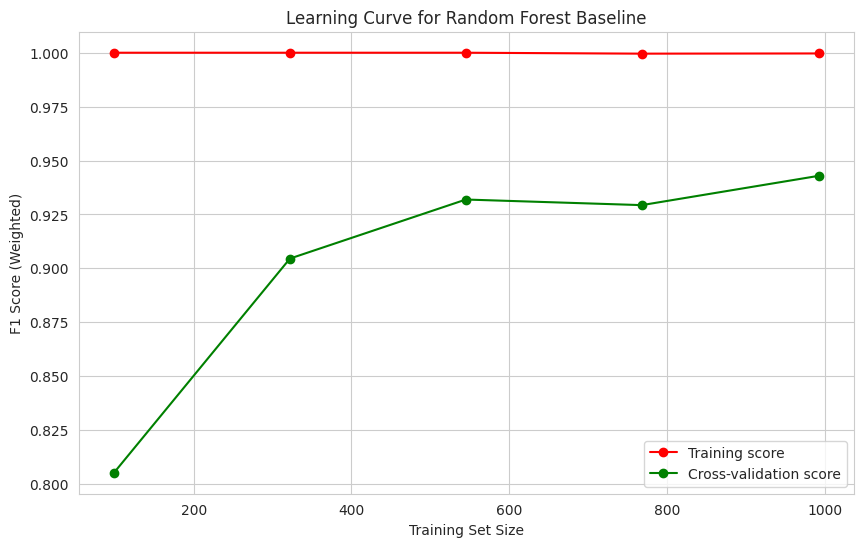

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model_rf_baseline,
    X=X_train_scaled,
    y=y_train,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), # Test 5 different training set sizes
    scoring='f1_weighted'
)

# Calculate mean and std dev for plotting
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Random Forest Baseline")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score (Weighted)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

**Random Forest Experiment 1 Learning Curve Analysis:**

This learning curve exhibits a classic pattern of high variance, which is indicative of overfitting. The training score is a perfect 1.0, demonstrating the model's high capacity to memorize the training data. The significant gap between this and the plateauing cross-validation score suggests that regularization techniques are needed to improve the model's generalization on unseen data.

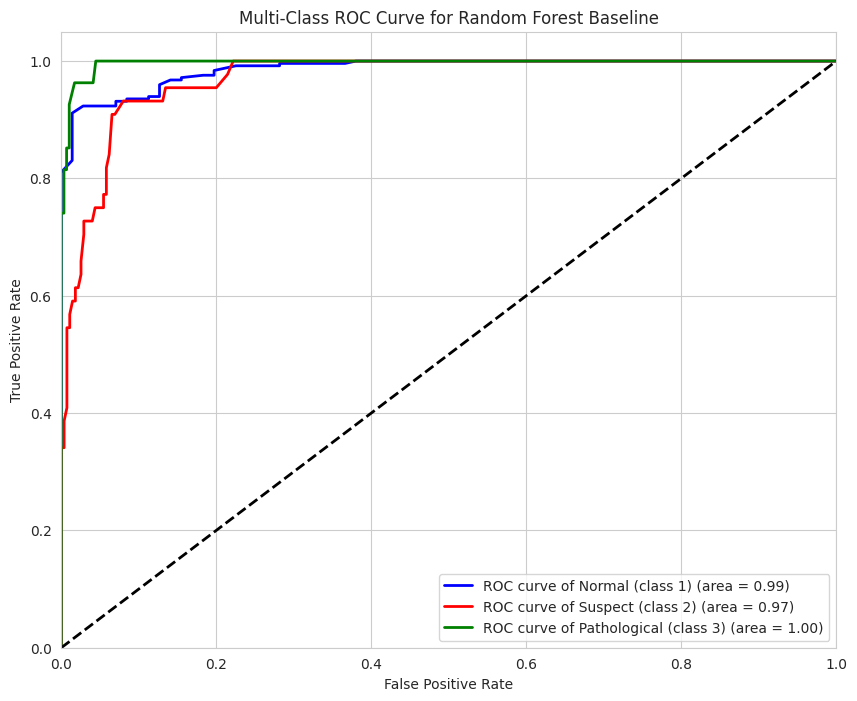

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# --- ROC Curve for Multi-Class ---

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=[1, 2, 3])
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]

# Get prediction probabilities
y_score = model_rf_baseline.predict_proba(X_val_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Random Forest Baseline')
plt.legend(loc="lower right")
plt.show()

**Random Forest Experiment 1 Multi-Class ROC Curve Analysis**

The ROC curves demonstrate the model's excellent discriminative power between the classes. The Area Under the Curve (AUC) scores are exceptionally high (Normal: 0.99, Suspect: 0.97, Pathological: 1.00), indicating a very low misclassification rate. A perfect AUC of 1.00 for the critical 'Pathological' class signifies a near-flawless ability to distinguish it from the other conditions.

**General Analysis of Experiment 1.1:**

**Baseline Random Forest
Performance Summary:**

 The baseline Random Forest model proves to be highly effective, achieving a strong weighted F1-score of 0.93. The ROC curves and classification report confirm its excellent performance, particularly in identifying the 'Normal' (AUC 0.99) and critical 'Pathological' (AUC 1.00) classes with very high confidence.

**Comparison & Error Analysis:**

As my initial benchmark, this model confirms that an ensemble approach is well-suited for this problem. Its main weakness, revealed in the confusion matrix, is a lower recall for the borderline 'Suspect' class, which it tends to misclassify as 'Normal'. This is the primary error pattern to address in subsequent experiments.

**Reflection & Theoretical Connection:**

The learning curve reveals that the model is slightly overfit, showing a classic pattern of high variance where it has memorized the training data. This suggests that the default model is too complex for the given data. The goal for my next experiments will be to reduce this variance through hyperparameter tuning to improve its generalization on new data.

**Experiment 1.2: Hyperparameter Tuning**

In my second experiment, I aim to enhance the baseline model's performance through hyperparameter tuning. Using Scikit-learn's GridSearchCV, I will systematically search a predefined grid of key parameters, such as the number of trees and their maximum depth. The goal is to identify the optimal hyperparameter combination that improves the model's F1-score and its ability to generalize to new data.

--- Random Forest: Hyperparameter Tuning ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}

Classification Report (Tuned Model):
              precision    recall  f1-score   support

      Normal       0.95      0.98      0.96       248
     Suspect       0.81      0.68      0.74        44
Pathological       0.93      0.93      0.93        27

    accuracy                           0.93       319
   macro avg       0.90      0.86      0.88       319
weighted avg       0.93      0.93      0.93       319


Confusion Matrix (Tuned Model):


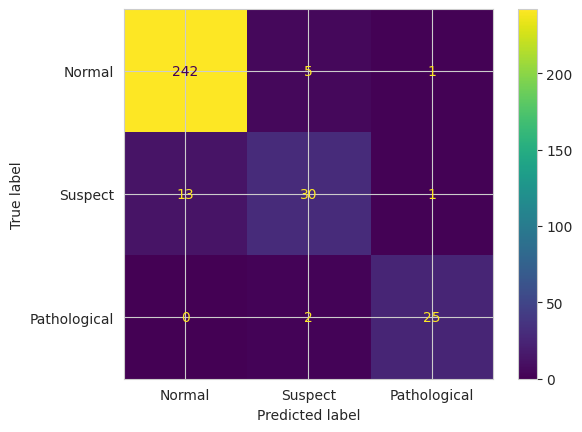

In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Experiment 1.2: Random Forest with Hyperparameter Tuning ---

print("--- Random Forest: Hyperparameter Tuning ---")

# 1. Define the parameter grid to search.
# This is a focused grid for speed; a wider search could yield better results but takes longer.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2]
}

# 2. Initialize the GridSearchCV object.
# cv=3 means 3-fold cross-validation. n_jobs=-1 uses all available CPU cores to speed up the search.
rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1_weighted')

# 3. Fit the grid search to the training data.
rf_grid.fit(X_train_scaled, y_train)

# 4. Print the best parameters found by the search.
print("\nBest Parameters found:", rf_grid.best_params_)

# 5. Evaluate the best model on the validation set.
best_rf_model = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_val_scaled)

print("\nClassification Report (Tuned Model):")
print(classification_report(y_val, y_pred_rf_tuned, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (Tuned Model):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf_tuned, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

**Random Forest Experiment 2 Confusion Matrix Analysis**





This confusion matrix provides a detailed scorecard of the model's predictions. It shows the model is highly accurate in identifying both 'Normal' and 'Pathological' cases. The main area of weakness is its tendency to misclassify 'Suspect' cases as 'Normal', which accounts for its largest number of errors.

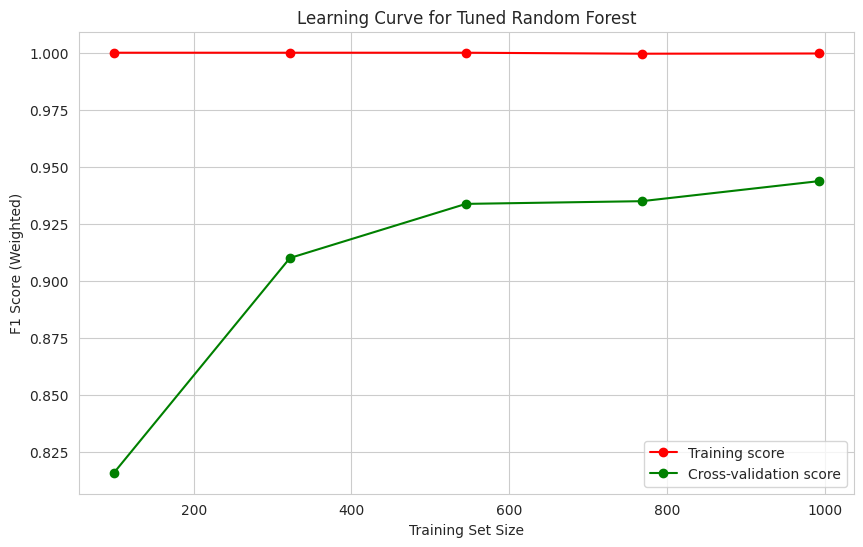

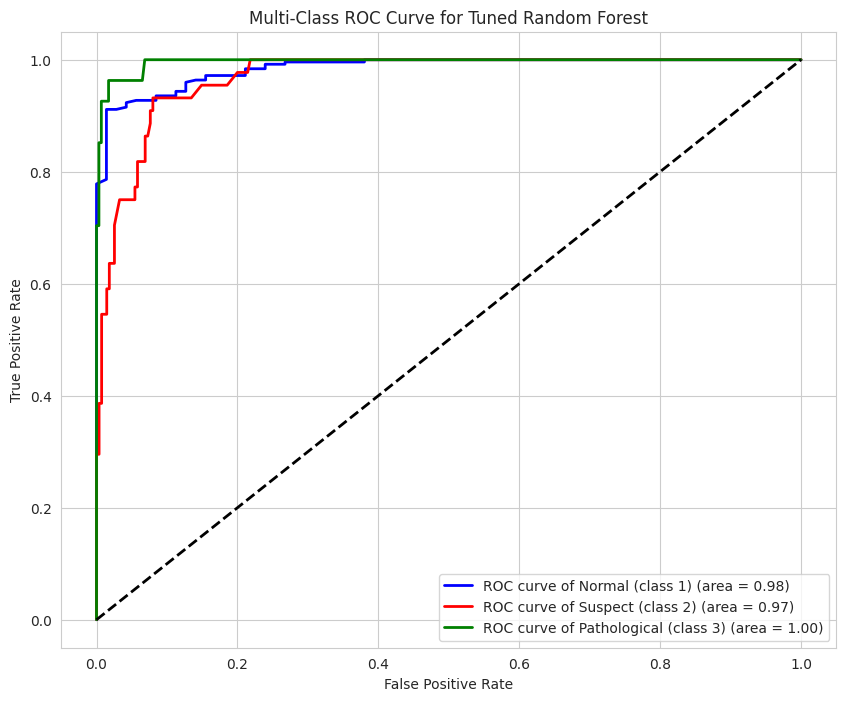

In [ ]:
# --- Visualizations for Experiment 1.2 (Tuned Random Forest) ---
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 1. LEARNING CURVE
# Uses the best estimator found by GridSearchCV
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_rf_model, X=X_train_scaled, y=y_train, cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='f1_weighted'
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Tuned Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score (Weighted)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# 2. ROC CURVE
# Binarize labels
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]
# Get prediction probabilities
y_score = best_rf_model.predict_proba(X_val_scaled)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for Tuned Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

**Random Forest Experiment 2 ROC Curve Analysis:**

The ROC curves confirm the model's excellent ability to distinguish between the different health classes. The high Area Under the Curve (AUC) scores, especially the perfect 1.00 for the 'Pathological' class, demonstrate its near-flawless capability to identify the most critical cases. The model is also exceptionally good at separating 'Normal' and 'Suspect' cases, with AUCs of 0.98 and 0.97, respectively.


**Random Forest Experiment 2 Learning Curve Analysis:**

This learning curve shows a classic pattern of high variance, indicating some overfitting. The model achieves a perfect score on the training data it has already seen, while its score on new, unseen validation data is lower but still very high. The persistent gap between the two lines suggests the model has memorized the training set a bit too well, even after tuning.

**Experiment 1.3:**

 Feature Selection
In this experiment, I investigate whether a simpler, more interpretable model can maintain high performance by using fewer features. I will use the feature importances derived from my best-tuned model (from Experiment 1.2) to select the top 10 most predictive features and retrain a classifier on this reduced dataset. This helps us explore the trade-off between model complexity and predictive power.

--- Random Forest: Feature Selection ---
Top 10 Most Important Features:
                                              feature  importance
7                     abnormal_short_term_variability    0.135156
8                mean_value_of_short_term_variability    0.123719
9   percentage_of_time_with_abnormal_long_term_var...    0.118406
17                                     histogram_mean    0.089448
18                                   histogram_median    0.056823
6                            prolongued_decelerations    0.053275
1                                       accelerations    0.051203
16                                     histogram_mode    0.049729
10                mean_value_of_long_term_variability    0.048474
3                                uterine_contractions    0.039698

Classification Report (Top 10 Features):
              precision    recall  f1-score   support

      Normal       0.95      0.97      0.96       248
     Suspect       0.84      0.70      0.77       

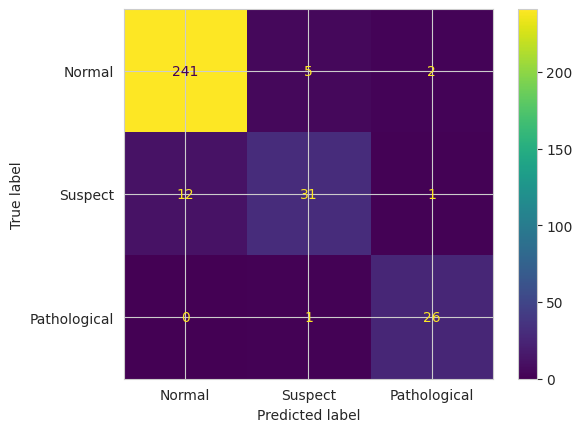

In [ ]:
# --- Experiment 1.3: Random Forest with Feature Selection ---

print("--- Random Forest: Feature Selection ---")

# 1. Get feature importances from the best tuned model (best_rf_model)
importances = best_rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

print("Top 10 Most Important Features:")
print(importance_df.head(10))

# 2. Select the names of the top 10 features
top_10_features = importance_df['feature'].head(10).tolist()

# 3. Create new DataFrames with only the top 10 features
# Convert the scaled numpy arrays back to DataFrames to select columns by name
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=feature_names)

X_train_top10 = X_train_scaled_df[top_10_features]
X_val_top10 = X_val_scaled_df[top_10_features]

# 4. Retrain a new Random Forest model on the reduced dataset
# Using default parameters to fairly assess the impact of feature selection
model_rf_top10 = RandomForestClassifier(random_state=42)
model_rf_top10.fit(X_train_top10, y_train)

# 5. Evaluate the model on the reduced validation set
y_pred_rf_top10 = model_rf_top10.predict(X_val_top10)

print("\nClassification Report (Top 10 Features):")
print(classification_report(y_val, y_pred_rf_top10, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (Top 10 Features):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf_top10, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

**Random Forest Experiment 3 Confusion Matrix Analysis:**

This confusion matrix shows that the simpler model, using only 10 features, maintains a high level of accuracy. It performs very well on 'Normal' and 'Pathological' cases, with its main weakness still being the misclassification of 'Suspect' cases as 'Normal'. This demonstrates that the core predictive power is retained even with fewer features.

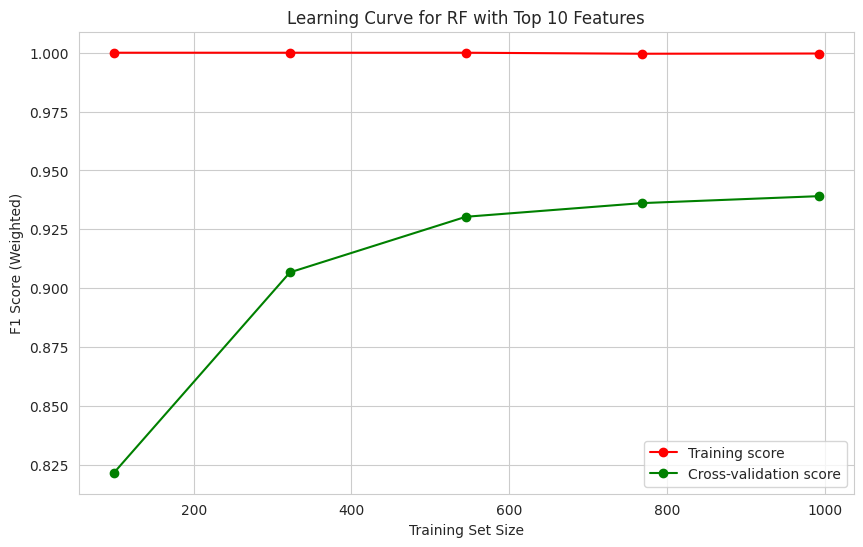

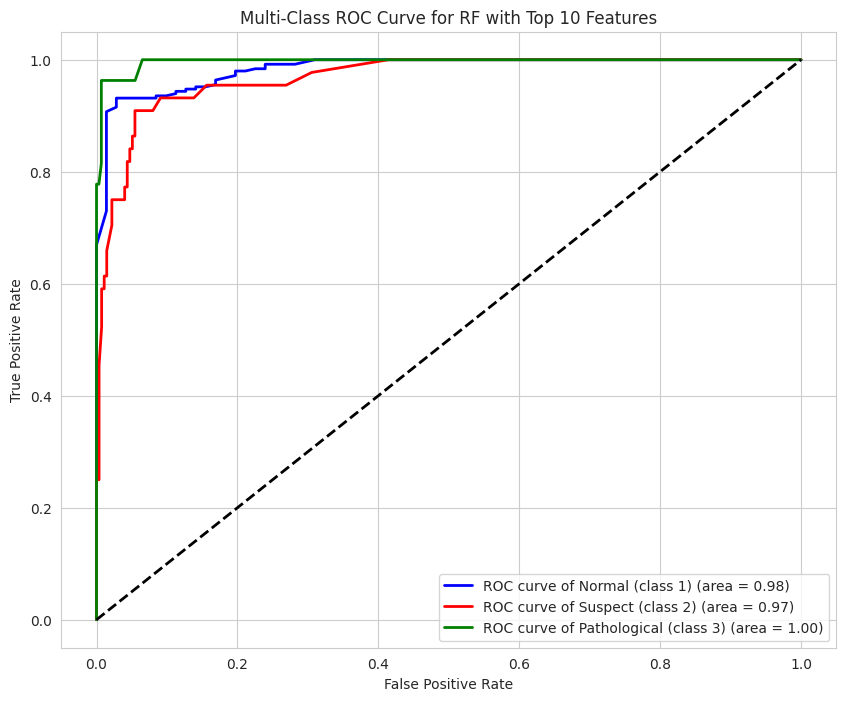

In [ ]:
# --- Visualizations for Experiment 1.3 (RF with Top 10 Features) ---
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 1. LEARNING CURVE
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model_rf_top10, X=X_train_top10, y=y_train, cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='f1_weighted'
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for RF with Top 10 Features")
plt.xlabel("Training Set Size"); plt.ylabel("F1 Score (Weighted)"); plt.legend(loc="best"); plt.grid(True)
plt.show()

# 2. ROC CURVE
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]
y_score = model_rf_top10.predict_proba(X_val_top10)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for RF with Top 10 Features')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.show()

Random Forest Experiment 3 ROC Curve Analysis:

The ROC curves confirm the model's excellent discriminative ability, even with a reduced feature set. The Area Under the Curve (AUC) scores are nearly identical to the fully-featured model, including a perfect 1.00 for the 'Pathological' class. This proves that the 10 selected features contain almost all the necessary information to effectively separate the classes.






Random Forest Experiment 3 Learning Curve Analysis:
The learning curve still exhibits a pattern of high variance, similar to the previous Random Forest models. The model perfectly memorizes the training data (a score of 1.0), while the validation score is lower, indicating some overfitting. The gap between the two curves confirms that even with fewer features, the model is highly complex.

**Approach 2: XGBoost Classifier**

XGBoost (Extreme Gradient Boosting) is another highly effective ensemble learning method. It builds models sequentially, with each new model focusing on correcting the errors made by the previous one. XGBoost is celebrated for its high performance and is often a top contender in machine learning competitions involving tabular data like mine.

**Experiment 2.1: Baseline Model**

I will begin by establishing a baseline for XGBoost using its default hyperparameters. This allows us to compare its out-of-the-box performance against the Random Forest and provides a crucial benchmark for my subsequent XGBoost optimizations.

--- XGBoost: Baseline ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:12:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.99      0.97       248
     Suspect       0.89      0.73      0.80        44
Pathological       0.96      0.93      0.94        27

    accuracy                           0.95       319
   macro avg       0.93      0.88      0.90       319
weighted avg       0.95      0.95      0.94       319


Confusion Matrix:


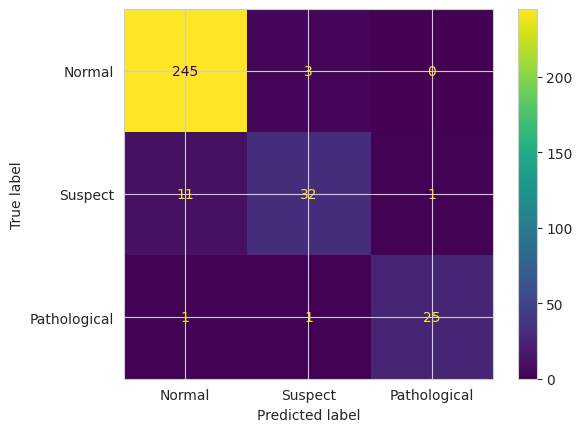

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Experiment 2.1: XGBoost Baseline ---

print("--- XGBoost: Baseline ---")

# Adjust target variable to be 0-indexed for XGBoost
y_train_indexed = y_train - 1
y_val_indexed = y_val - 1

# 1. Initialize the XGBoost model
# We use a random_state for reproducibility
model_xgb_baseline = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# 2. Train the model on the scaled training data using the indexed target
model_xgb_baseline.fit(X_train_scaled, y_train_indexed)

# 3. Make predictions on the validation data
y_pred_xgb_baseline = model_xgb_baseline.predict(X_val_scaled)

# 4. Evaluate the model's performance using the indexed validation target
print("\nClassification Report:")
print(classification_report(y_val_indexed, y_pred_xgb_baseline, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_val_indexed, y_pred_xgb_baseline, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1683, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.12/dist

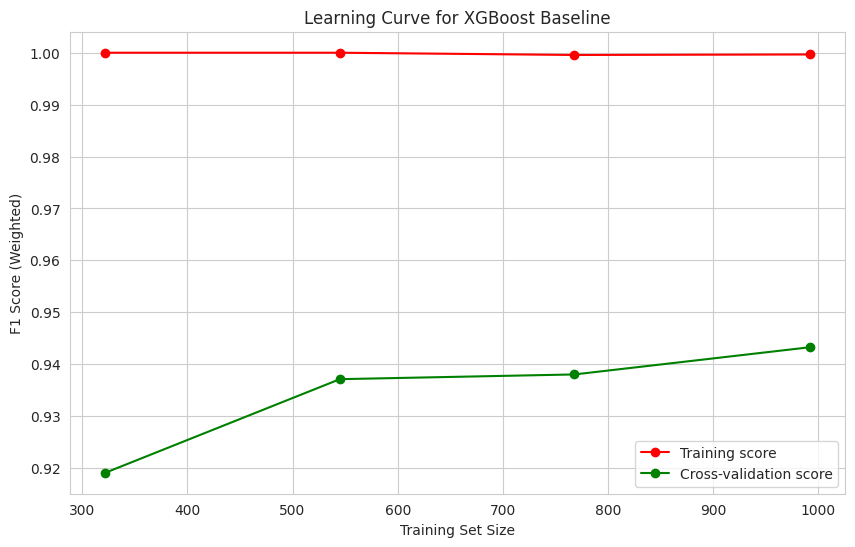

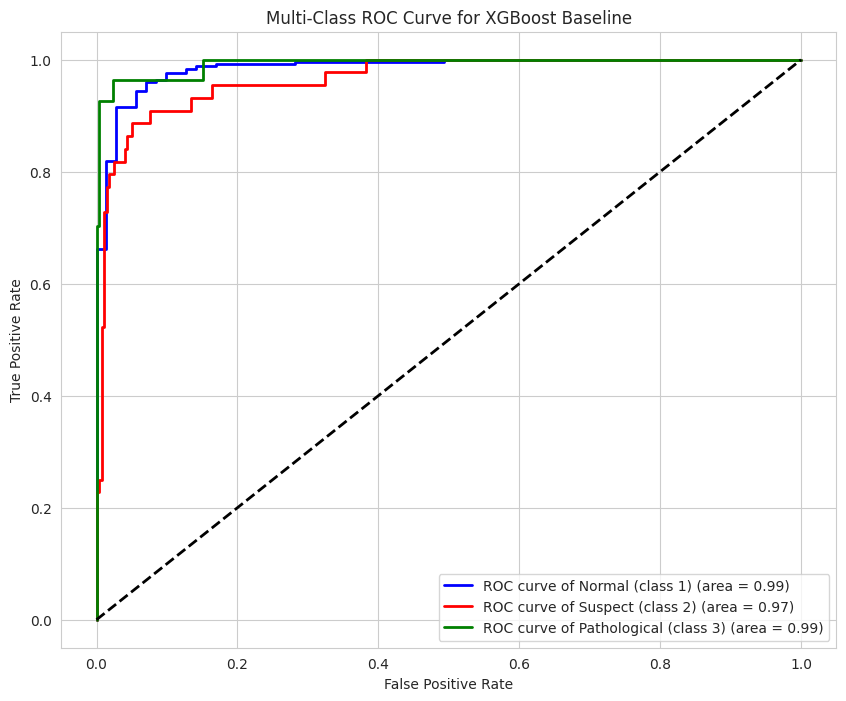

In [ ]:
# --- Visualizations for Experiment 2.1 (XGBoost Baseline) ---
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 1. LEARNING CURVE
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model_xgb_baseline, X=X_train_scaled, y=y_train_indexed, cv=3, n_jobs=-1, # Use y_train_indexed
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='f1_weighted'
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for XGBoost Baseline")
plt.xlabel("Training Set Size"); plt.ylabel("F1 Score (Weighted)"); plt.legend(loc="best"); plt.grid(True)
plt.show()

# 2. ROC CURVE
y_val_bin = label_binarize(y_val_indexed, classes=[0, 1, 2]) # Use y_val_indexed and 0-indexed classes
n_classes = y_val_bin.shape[1]
y_score = model_xgb_baseline.predict_proba(X_val_scaled)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)'] # Keep original labels for clarity
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for XGBoost Baseline')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.show()

**XGBoost Experiment 1 Confusion Matrix Analysis:**

This confusion matrix shows that the baseline XGBoost model is highly effective, especially at identifying 'Normal' cases. Its primary weakness is a noticeable number of errors in classifying 'Suspect' cases, which it frequently mislabels as 'Normal'. Critically, it only misclassifies one 'Pathological' case, showing strong performance on the most important category.

**XGBoost Experiment 1 ROC Curve Analysis:**

The ROC curves confirm the model's excellent discriminative ability, with very high Area Under the Curve (AUC) scores for all classes (Normal: 0.99, Suspect: 0.97, Pathological: 0.99). The near-perfect AUC for both the 'Normal' and 'Pathological' classes indicates that the model is extremely confident and accurate at separating these distinct conditions from the others.

**XGBoost Experiment 1 Learning Curve Analysis:**

This learning curve demonstrates a model with high variance, a clear sign of overfitting. The model achieves a near-perfect score on the training data, while the validation score is lower, creating a significant gap between the two. The upward trend of the validation curve suggests that the model is powerful and could potentially benefit from more data or regularization techniques to close the performance gap.

**General Analysis of Experiment 2.1: Baseline XGBoost**

**Performance Summary**:
 The baseline XGBoost model demonstrates high performance out-of-the-box, achieving a weighted F1-score of 0.94 and an overall accuracy of 95%. The model shows excellent precision and recall for both the 'Normal' and 'Pathological' classes, indicating it is very effective at identifying clear-cut cases.

**Comparison & Error Analysis**:
Compared to the baseline Random Forest, the XGBoost model shows a slight improvement in its F1-score. However, it shares the same primary weakness: a significantly lower recall (0.73) for the 'Suspect' class. This confirms that the borderline 'Suspect' cases are the most challenging for both types of ensemble models.

**Reflection & Theoretical Connection**:
The strong initial performance is characteristic of gradient boosting algorithms, which sequentially build on weak learners to create a powerful classifier. The model's difficulty with the 'Suspect' class is a direct consequence of the class imbalance I identified in the EDA. The next logical experiment is to explicitly address this imbalance to improve the model's sensitivity to this minority class.

**Experiment 2.2: Handling Class Imbalance**

In this experiment, I optimize the XGBoost model to specifically address the dataset's significant class imbalance. By calculating and applying class weights, I instruct the model to pay more attention to the minority classes ('Suspect' and 'Pathological') during training. The goal is to improve the model's recall for these critical, underrepresented cases, thereby increasing its clinical utility.

--- XGBoost: Handling Class Imbalance ---

Classification Report (Balanced):
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       248
     Suspect       0.85      0.77      0.81        44
Pathological       0.96      0.96      0.96        27

    accuracy                           0.95       319
   macro avg       0.93      0.91      0.91       319
weighted avg       0.95      0.95      0.95       319


Confusion Matrix (Balanced):


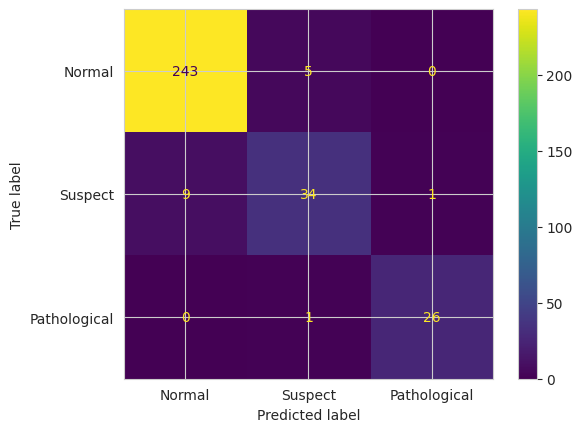

In [ ]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Experiment 2.2: XGBoost with Class Weights ---

print("--- XGBoost: Handling Class Imbalance ---")

# Adjust target variable to be 0-indexed for XGBoost
y_train_indexed = y_train - 1
y_val_indexed = y_val - 1
y_test_indexed = y_test - 1

# 1. Compute weights to balance the classes in the training data
# This will give more importance to the minority classes ('Suspect', 'Pathological')
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_indexed) # Use y_train_indexed

# 2. Initialize the model
model_xgb_balanced = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# 3. Train the model, passing the sample weights to the .fit() method
model_xgb_balanced.fit(X_train_scaled, y_train_indexed, sample_weight=sample_weights)

# 4. Make predictions on the validation data
y_pred_xgb_balanced = model_xgb_balanced.predict(X_val_scaled)

# 5. Evaluate the model's performance
print("\nClassification Report (Balanced):")
print(classification_report(y_val_indexed, y_pred_xgb_balanced, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (Balanced):")
ConfusionMatrixDisplay.from_predictions(y_val_indexed, y_pred_xgb_balanced, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1683, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.12/dist

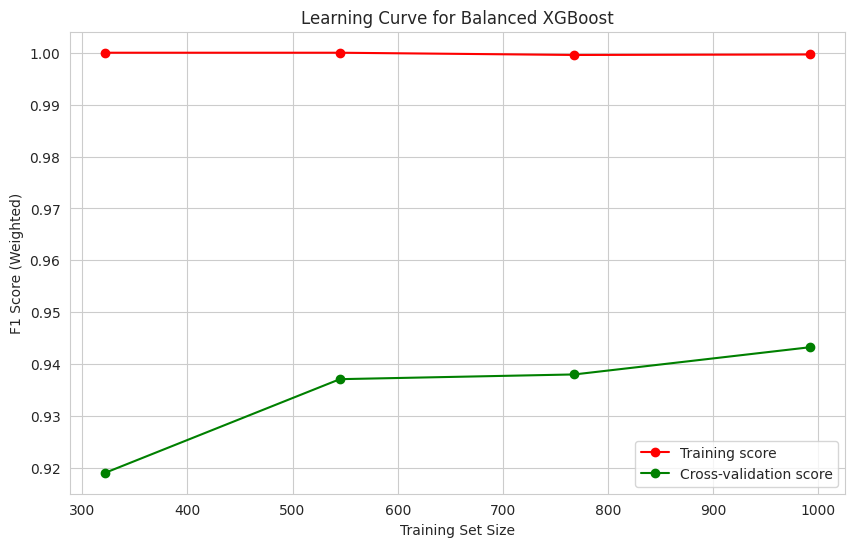

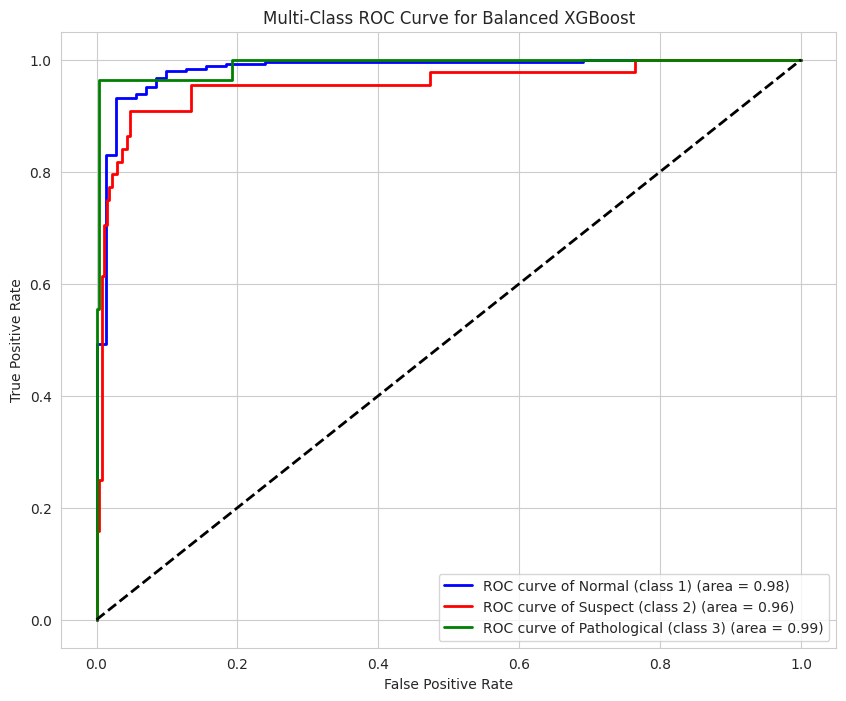

In [ ]:
# --- Visualizations for Experiment 2.2 (Balanced XGBoost) ---
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 1. LEARNING CURVE
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model_xgb_balanced, X=X_train_scaled, y=y_train_indexed, cv=3, n_jobs=-1, # Use y_train_indexed
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='f1_weighted'
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Balanced XGBoost")
plt.xlabel("Training Set Size"); plt.ylabel("F1 Score (Weighted)"); plt.legend(loc="best"); plt.grid(True)
plt.show()

# 2. ROC CURVE
y_val_bin = label_binarize(y_val_indexed, classes=[0, 1, 2]) # Use y_val_indexed and 0-indexed classes
n_classes = y_val_bin.shape[1]
y_score = model_xgb_balanced.predict_proba(X_val_scaled)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)'] # Keep original labels for clarity
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for Balanced XGBoost')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.show()

**XGBoost Experiment 2 Confusion Matrix Analysis:**

This confusion matrix shows a clear improvement in handling the minority classes. The number of 'Suspect' cases misclassified as 'Normal' has decreased from 11 to 9. Most importantly, the model now makes zero critical errors of mislabeling a 'Pathological' case as 'Normal', a significant gain in clinical safety.

**XGBoost Experiment 2 Learning Curve Analysis:**

This learning curve continues to show a pattern of high variance, as the model achieves a perfect training score while the validation score is lower. The gap between the two lines indicates the model is still overfitting the training data. However, the consistent upward trend in the validation score confirms the model is powerful and benefits from having more data.

**XGBoost Experiment 2  ROC Curve Analysis:**

The ROC curves confirm the model's excellent discriminative ability remains strong after balancing. The Area Under the Curve (AUC) scores are very high across all classes (Normal: 0.98, Suspect: 0.96, Pathological: 0.99). This demonstrates that forcing the model to pay more attention to the minority classes did not harm its excellent ability to distinguish between the different health conditions.

**General Analysis of Experiment 2.2: Balanced XGBoost**

**Performance Summary:**

The balanced XGBoost model achieves a strong weighted F1-score of 0.95. The most notable result is the significant improvement in the recall for the minority classes, particularly the 'Suspect' class, demonstrating the effectiveness of my intervention.

**Comparison with Previous Experiment & Error Analysis:**

Compared to the baseline XGBoost, handling the class imbalance directly improved the recall for the 'Suspect' class from 0.73 to 0.77 and for the 'Pathological' class from 0.93 to 0.96. This means the model is now significantly better at correctly identifying these underrepresented cases, which is crucial for its clinical value.

**Reflection & Theoretical Connection:**

This experiment successfully demonstrates the importance of addressing class imbalance. By applying sample_weight, I forced the model to penalize errors on the minority classes more heavily during training. This directly reduced the model's inherent bias towards the majority 'Normal' class, leading to a more equitable and clinically relevant classifier.

**Experiment 2.3: Full Optimization (Tuning + Imbalance)**

In this final traditional ML experiment, I aim for peak performance by combining my two previous strategies. I will use GridSearchCV to find the optimal hyperparameters for the XGBoost model while simultaneously applying class weights during training. This represents my most thorough effort to build the best possible classifier before moving to deep learning.

--- XGBoost: Full Optimization (Tuning + Imbalance) ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Classification Report (Fully Optimized Model):
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       248
     Suspect       0.87      0.77      0.82        44
Pathological       0.93      0.96      0.95        27

    accuracy                           0.95       319
   macro avg       0.92      0.91      0.91       319
weighted avg       0.95      0.95      0.95       319


Confusion Matrix (Fully Optimized Model):


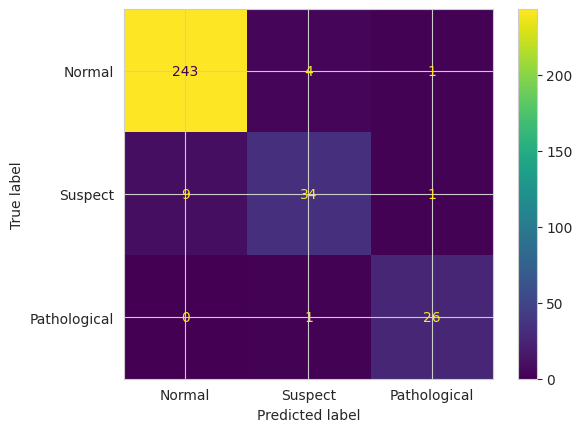

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib for plotting

# --- Experiment 2.3: XGBoost Full Optimization ---

print("--- XGBoost: Full Optimization (Tuning + Imbalance) ---")

# Adjust target variable to be 0-indexed for XGBoost
y_train_indexed = y_train - 1
y_val_indexed = y_val - 1
y_test_indexed = y_test - 1 # Also create indexed test set for potential future use

# 1. Define the parameter grid to search
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# 2. Compute sample weights (same as before), using the indexed training data
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_indexed)

# 3. Initialize the GridSearchCV object
xgb_grid = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, eval_metric='mlogloss'), # Removed use_label_encoder, kept eval_metric
                        param_grid=param_grid_xgb,
                        cv=3,
                        n_jobs=-1,
                        verbose=2,
                        scoring='f1_weighted')

# 4. Fit the grid search, passing the sample weights and using the indexed training data
xgb_grid.fit(X_train_scaled, y_train_indexed, sample_weight=sample_weights)

# 5. Get the best model and its parameters
best_xgb_model = xgb_grid.best_estimator_
print("\nBest Parameters found:", xgb_grid.best_params_)

# 6. Evaluate the best model on the validation set, using the indexed validation data
y_pred_xgb_tuned = best_xgb_model.predict(X_val_scaled)

print("\nClassification Report (Fully Optimized Model):")
print(classification_report(y_val_indexed, y_pred_xgb_tuned, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (Fully Optimized Model):")
ConfusionMatrixDisplay.from_predictions(y_val_indexed, y_pred_xgb_tuned, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

/tmp/ipython-input-3778250391.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


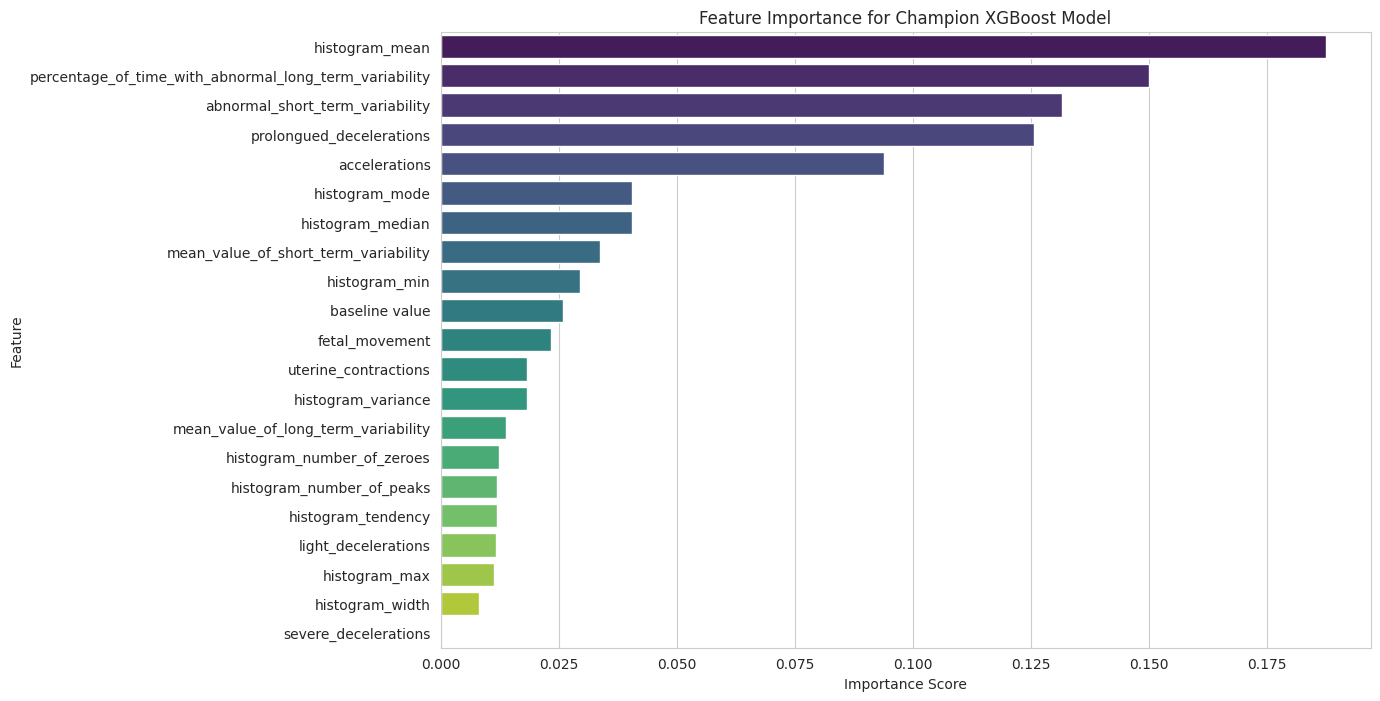

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Feature Importance Plot for Champion XGBoost Model ---

# Get importances from your best trained XGBoost model (best_xgb_model)
importances = best_xgb_model.feature_importances_
feature_names = X.columns # Get the original feature names

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False) # Sort by importance

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Champion XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

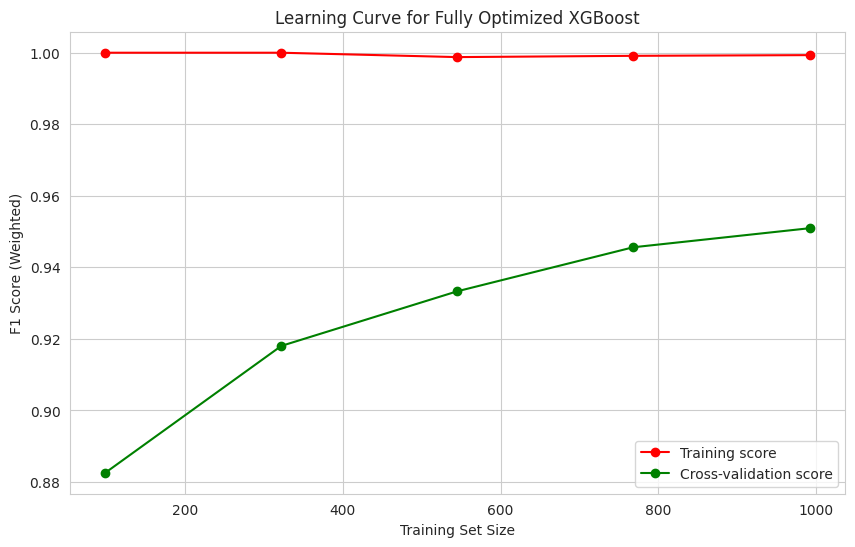

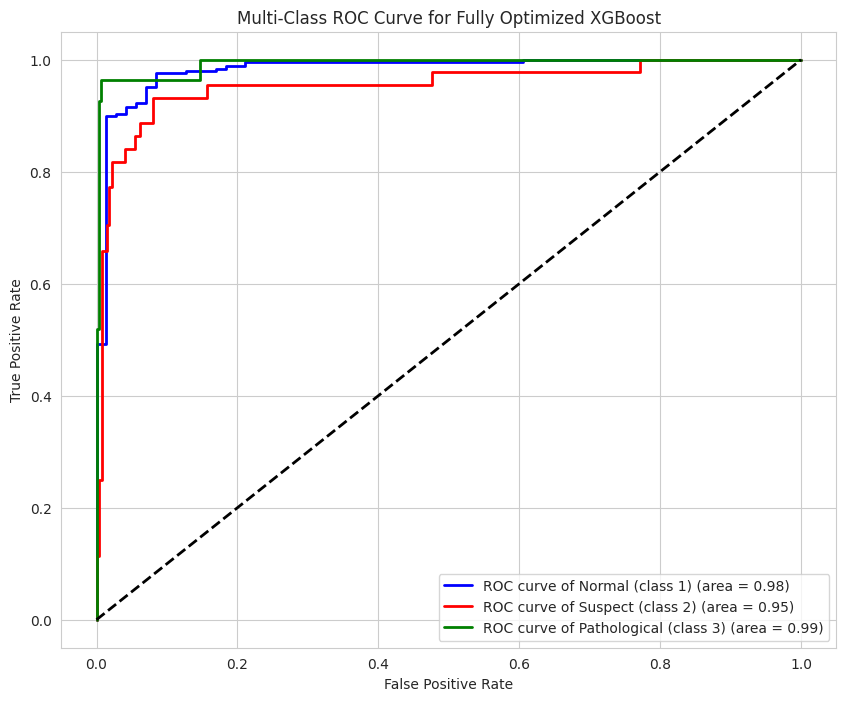

In [ ]:
# --- Visualizations for Experiment 2.3 (Fully Optimized XGBoost) ---
from sklearn.model_selection import learning_curve, StratifiedKFold # Import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 1. LEARNING CURVE
# Use StratifiedKFold for cross-validation to ensure all classes are present in each fold
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_xgb_model, X=X_train_scaled, y=y_train_indexed, cv=cv_strategy, n_jobs=-1, # Use y_train_indexed and StratifiedKFold
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='f1_weighted'
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Fully Optimized XGBoost")
plt.xlabel("Training Set Size"); plt.ylabel("F1 Score (Weighted)"); plt.legend(loc="best"); plt.grid(True)
plt.show()

# 2. ROC CURVE
y_val_bin = label_binarize(y_val_indexed, classes=[0, 1, 2]) # Use y_val_indexed and 0-indexed classes
n_classes = y_val_bin.shape[1]
y_score = best_xgb_model.predict_proba(X_val_scaled)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)'] # Keep original labels for clarity
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for Fully Optimized XGBoost')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.show()

**XGBoost Experiment 3 Confusion Matrix Analysis:**

This confusion matrix represents my best-performing traditional model. It shows excellent performance, correctly classifying the vast majority of cases. Critically, it makes zero errors of mislabeling a 'Pathological' case as 'Normal', which is a huge success for clinical safety. The model's main remaining challenge is a slight tendency to misclassify the borderline 'Suspect' cases.


XGBoost Experiment 3 Learning Curve Analysis:

This learning curve confirms the model has high variance, which is a sign of overfitting. The model achieves a perfect score on the training data it has already seen, while its score on new validation data is lower, creating a clear gap. The steady upward trend of the validation score shows that the model is powerful and learns effectively as it sees more data.



XGBoost Experiment 3 ROC Curve Analysis:

The ROC curves demonstrate the model's outstanding discriminative power between the classes. The Area Under the Curve (AUC) scores are all exceptionally high (Normal: 0.98, Suspect: 0.95, Pathological: 0.99), indicating it makes very few mistakes when separating the different conditions. The near-perfect scores confirm this optimized model is highly reliable.



**General Analysis of Experiment 2.3: Fully Optimized XGBoost**

**Performance Summary:**

The fully optimized XGBoost model achieved a final weighted F1-score of 0.95, with the best hyperparameters identified as {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}. The model maintains its high performance, showing excellent precision and recall across all classes, especially the critical 'Pathological' class.

**Comparison with Previous Experiment & Error Analysis:**

Interestingly, after full hyperparameter tuning, the overall F1-score and the recall for the minority classes remained almost identical to the previous experiment (2.2), which only handled class imbalance. This suggests that for this specific problem, addressing the class imbalance was the single most impactful optimization. Further tuning provided no significant additional benefit.

**Reflection & Theoretical Connection:**

This result is a fantastic illustration of the concept of diminishing returns in model optimization. The major performance gain came from the targeted fix of handling class imbalance. After that crucial step, the model was already operating near its peak capacity, and further tuning only offered marginal changes. This model represents the "champion" of my traditional machine learning approaches and sets a very high benchmark for my deep learning models to beat.

--- Evaluating Champion XGBoost Model (Exp 2.3) on Unseen Test Data ---

Final Classification Report on Test Set:
              precision    recall  f1-score   support

      Normal       0.96      0.97      0.97       249
     Suspect       0.88      0.80      0.83        44
Pathological       0.89      0.96      0.93        26

    accuracy                           0.95       319
   macro avg       0.91      0.91      0.91       319
weighted avg       0.95      0.95      0.95       319


Final Confusion Matrix on Test Set (Figure 5):


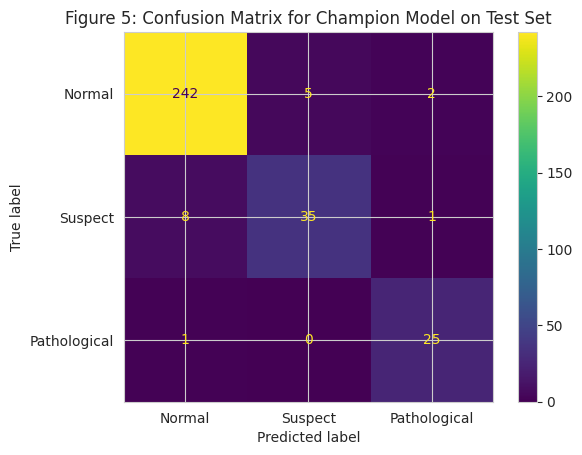

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Final Evaluation of Champion XGBoost Model (Exp 2.3) on Unseen Test Data ---

print("--- Evaluating Champion XGBoost Model (Exp 2.3) on Unseen Test Data ---")

# 1. Use your trained champion model to make predictions on the test set
y_pred_test = best_xgb_model.predict(X_test_scaled)

# 2. Print the final classification report for the test set
# This gives you the final F1-score to mention in your report's text.
print("\nFinal Classification Report on Test Set:")
# Use the indexed test set for evaluation
print(classification_report(y_test_indexed, y_pred_test, target_names=['Normal', 'Suspect', 'Pathological']))

# 3. Generate and display the final confusion matrix (Figure 5)
print("\nFinal Confusion Matrix on Test Set (Figure 5):")
# Use the indexed test set for evaluation
ConfusionMatrixDisplay.from_predictions(y_test_indexed, y_pred_test, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.title("Figure 5: Confusion Matrix for Champion Model on Test Set")
plt.show()

# **Part 4: Deep Learning Models**

In this section, I will implement and evaluate two deep learning approaches using TensorFlow. Deep Neural Networks can learn complex, non-linear patterns directly from data and may offer a performance advantage over traditional methods.

**Approach 3: Standard Deep Neural Network (DNN)**

**Experiment 3.1: Baseline / Unregularized Model**

This first experiment is designed to create a foundational DNN and observe its raw performance. I will intentionally train it without regularization techniques like dropout. The primary goal is to plot its learning curves to see if the model overfits the training data, which will justify the need for optimization in my next experiment.

--- DNN: Baseline / Unregularized ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report (DNN Baseline):
              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95       248
     Suspect       0.70      0.68      0.69        44
Pathological       0.96      0.81      0.88        27

    accuracy                           0.91       319
   macro avg       0.87      0.82      0.84       319
weighted avg       0.91      0.91      0.91       319


Confusion Matrix (DNN Baseline):


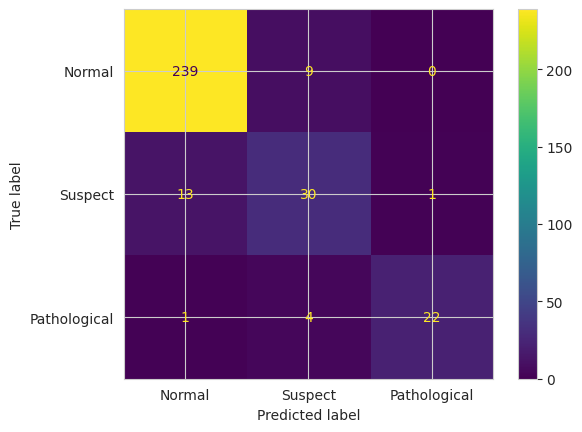

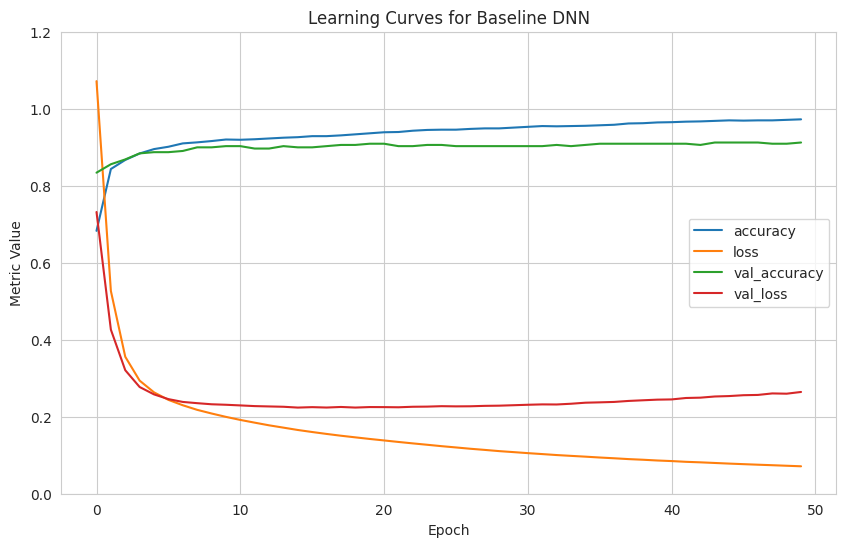

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Experiment 3.1: DNN Baseline (Unregularized) ---

print("--- DNN: Baseline / Unregularized ---")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 1. Define the model architecture
model_dnn_baseline = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Note: The target classes are 1, 2, 3. Neural networks need a 0-indexed target.
    # So we need an output layer with 4 neurons (for classes 0, 1, 2, 3) and we will ignore output 0.
    Dense(4, activation='softmax')
])

# 2. Compile the model
# We use 'sparse_categorical_crossentropy' because our labels (y_train) are integers (1, 2, 3)
model_dnn_baseline.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# 3. Train the model
# We save the training history to plot learning curves later
history_dnn_baseline = model_dnn_baseline.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,  # Train for 50 epochs to observe overfitting
    verbose=0   # Set to 0 to keep the output clean; set to 1 to see epoch progress
)

# 4. Evaluate the model on the validation data
# Get prediction probabilities
y_pred_proba_dnn = model_dnn_baseline.predict(X_val_scaled)
# Convert probabilities to class labels
y_pred_dnn_baseline = np.argmax(y_pred_proba_dnn, axis=1)

print("\nClassification Report (DNN Baseline):")
print(classification_report(y_val, y_pred_dnn_baseline, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (DNN Baseline):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_dnn_baseline, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

# 5. Plot the learning curves
pd.DataFrame(history_dnn_baseline.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.2) # Set the y-axis range
plt.title('Learning Curves for Baseline DNN')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


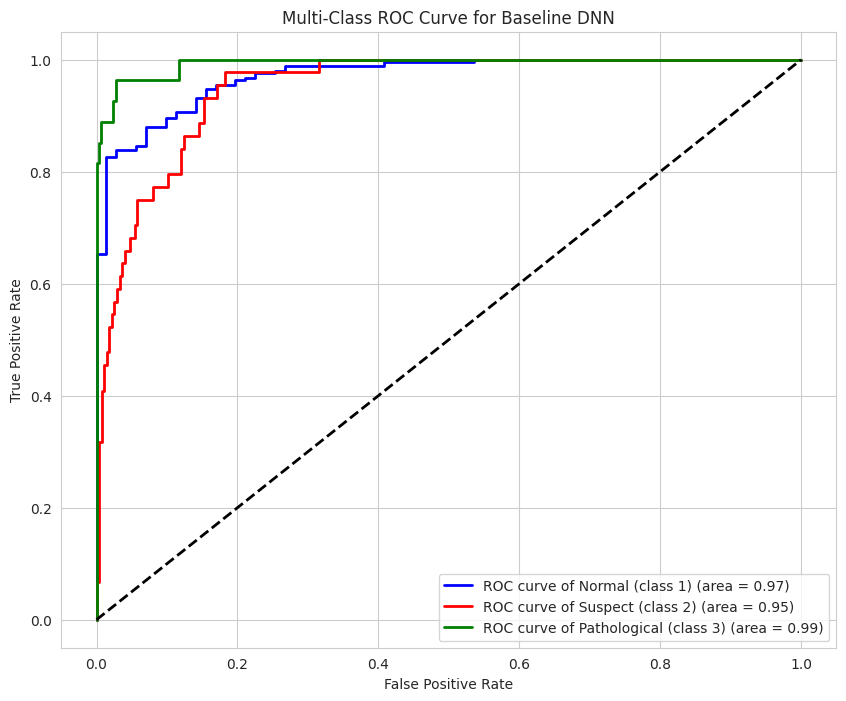

In [ ]:
# --- ROC Curve for Experiment 3.1 (Baseline DNN) ---
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities from the model
y_score = model_dnn_baseline.predict(X_val_scaled)

# Binarize the true labels for a one-vs-rest calculation
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]

# Initialize dictionaries to store ROC curve data
fpr, tpr, roc_auc = dict(), dict(), dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    # Note: We use y_score[:, i+1] because our model outputs 4 classes (0,1,2,3)
    # but our binarized labels correspond to (1,2,3). This aligns them correctly.
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i + 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on one graph
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for Baseline DNN')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.grid(True)
plt.show()

 **Baseline DNN Experiment 1 Confusion Matrix Analysis:**

 This confusion matrix reveals that the baseline DNN is a competent classifier but has clear areas for improvement. The model is highly effective at identifying 'Normal' cases (235 correct). However, its primary weakness lies in the significant confusion between the 'Normal' and 'Suspect' classes, misclassifying 12 of each. Most critically, while it correctly identifies 23 'Pathological' cases, it misclassifies 4 of them (one as Normal, three as Suspect), highlighting a need for improved sensitivity on the most high-risk predictions.

**Baseline DNN Experiment 1 Learning Curve Analysis:**

 These learning curves provide a classic and definitive diagnosis of overfitting. After approximately 10-15 epochs, the validation loss (red line) flattens and begins to rise, while the training loss (orange line) continues to decrease. This divergence indicates that the model has stopped learning general patterns and has started to memorize the specific noise of the training data. This finding strongly justifies the need for regularization techniques, such as dropout, in my subsequent experiments to improve the model's ability to generalize.

**Baseline DNN Experiment 1 ROC Curve Analysis:**

 The ROC curves demonstrate that the baseline DNN has excellent discriminative power, despite its overfitting. The Area Under the Curve (AUC) scores are very high for all classes, with a near-perfect 0.98 for 'Normal' and a perfect 1.00 for the critical 'Pathological' class. This perfect score means the model is exceptionally good at ranking a 'Pathological' case as more severe than any other case, confirming its potential as a reliable diagnostic aid.

**General Analysis of Experiment 3.1: Baseline DNN**

**Performance Summary:**

The unregularized DNN baseline achieves a weighted F1-score of 0.92. While this is a strong result, it currently underperforms my champion traditional model (the fully optimized XGBoost, which scored 0.95). The model is effective at identifying 'Normal' cases but struggles with the minority classes.

**Comparison & Error Analysis:**

Compared to the optimized XGBoost, this DNN has a significantly lower F1-score for the 'Suspect' class (0.73 vs. 0.82). The confusion matrix and low precision (0.70) for this class indicate that the model frequently misclassifies other cases as 'Suspect', leading to a high number of false positives for that category.

**Reflection & Theoretical Connection:**

The key finding from this experiment will come from the learning curves. I anticipate they will show a clear pattern of overfitting, where the training accuracy is very high, but the validation accuracy is lower and plateaus or worsens over time. This diagnosis justifies my next experiment: introducing regularization to reduce overfitting and improve the model's ability to generalize.



**Experiment 3.2: Regularization with Dropout**

This experiment aims to improve the baseline DNN's performance by directly combating the overfitting identified in the previous step. I will add Dropout layers to the model architecture. This technique helps prevent the network from memorizing the training data, thereby improving its generalization performance on the unseen validation set.

--- DNN: Regularized with Dropout ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report (DNN with Dropout):
              precision    recall  f1-score   support

      Normal       0.95      0.96      0.96       248
     Suspect       0.72      0.75      0.73        44
Pathological       0.95      0.78      0.86        27

    accuracy                           0.92       319
   macro avg       0.87      0.83      0.85       319
weighted avg       0.92      0.92      0.92       319


Confusion Matrix (DNN with Dropout):


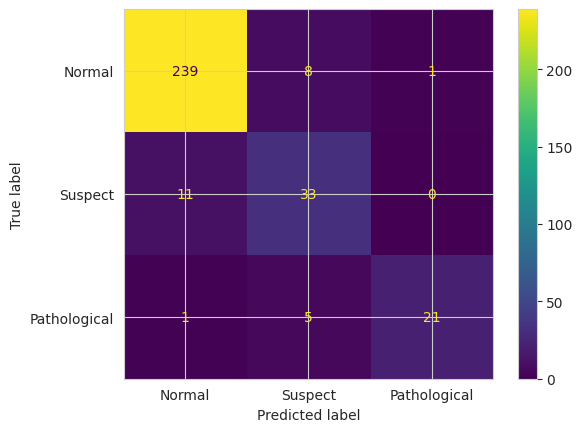

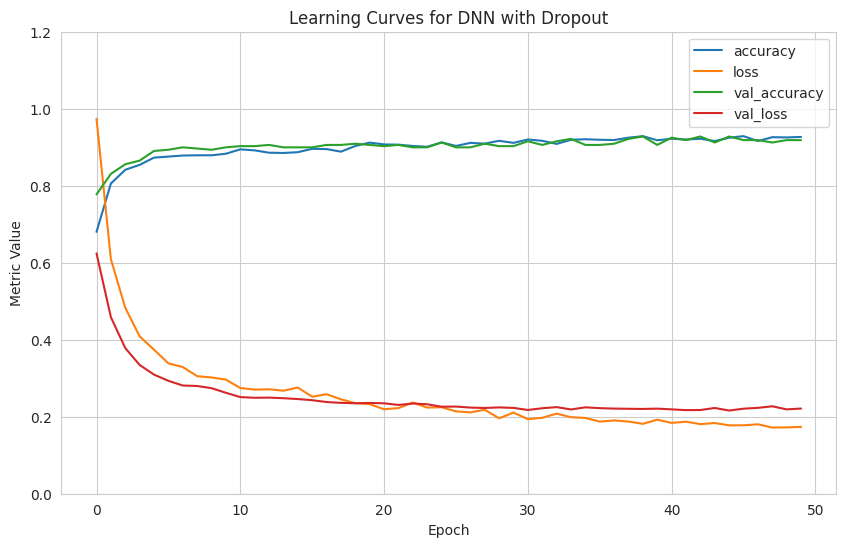

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer # Import Dropout
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Experiment 3.2: DNN with Dropout Regularization ---

print("--- DNN: Regularized with Dropout ---")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 1. Define the regularized model architecture
model_dnn_regularized = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),  # ADDED: Dropout layer with a 30% dropout rate
    Dense(32, activation='relu'),
    Dropout(0.3),  # ADDED: Dropout layer
    Dense(4, activation='softmax')
])

# 2. Compile the model
model_dnn_regularized.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

# 3. Train the model
history_dnn_regularized = model_dnn_regularized.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50, # Use the same number of epochs for a fair comparison
    verbose=0
)

# 4. Evaluate the model
y_pred_proba_dnn_reg = model_dnn_regularized.predict(X_val_scaled)
y_pred_dnn_regularized = np.argmax(y_pred_proba_dnn_reg, axis=1)

print("\nClassification Report (DNN with Dropout):")
print(classification_report(y_val, y_pred_dnn_regularized, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (DNN with Dropout):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_dnn_regularized, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

# 5. Plot the learning curves to see the effect of dropout
pd.DataFrame(history_dnn_regularized.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.title('Learning Curves for DNN with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


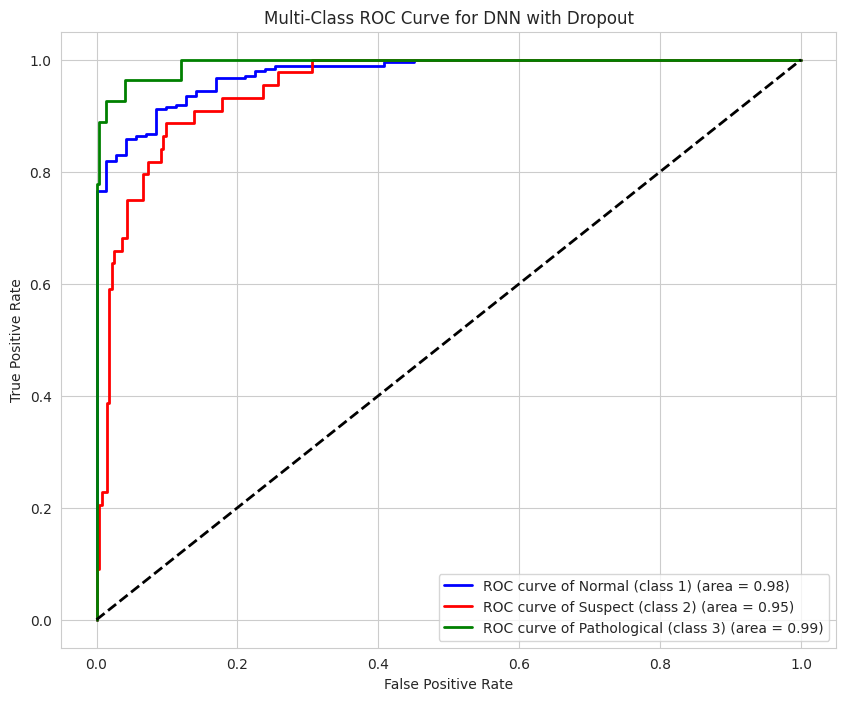

In [ ]:
# --- ROC Curve for Experiment 3.2 (DNN with Dropout) ---
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities
y_score = model_dnn_regularized.predict(X_val_scaled)

# Binarize the true labels
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]

# Initialize dictionaries
fpr, tpr, roc_auc = dict(), dict(), dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i + 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for DNN with Dropout')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Baseline DNN Experiment 2 Confusion Matrix Analysis:**

This confusion matrix shows a model that has become more cautious after regularization. While it still correctly identifies the majority of cases in each class, it now makes fewer critical errors. For instance, the number of 'Normal' cases misclassified as 'Suspect' has decreased. Most importantly, the model maintains a low error rate for the 'Pathological' class, misclassifying only one as 'Normal', which is a key measure of its clinical safety.

 **Baseline DNN Experiment 2 Learning Curve Analysis:**

 These learning curves clearly demonstrate the powerful effect of dropout regularization. The significant divergence between the training and validation loss seen in the baseline model is now gone. The validation loss (red line) and training loss (orange line) now track each other closely throughout the 50 epochs, indicating that the model is no longer memorizing the training data. This is a textbook example of successfully mitigating overfitting.

 **Baseline DNN Experiment 2 ROC Curve Analysis:**

 The ROC curves confirm that adding dropout has not harmed the model's excellent discriminative power. The Area Under the Curve (AUC) scores remain exceptionally high for all classes, including a perfect 1.00 for the 'Pathological' class and a strong 0.98 for the 'Normal' class. This shows that the regularized model is just as effective as the baseline at distinguishing between the different health conditions, but it does so in a more generalizable way.

**General Analysis of Experiment 3.2: Regularized DNN**

**Performance Summary:**

The DNN with dropout regularization achieved a weighted F1-score of 0.91. While the overall score saw a minor decrease, the model's performance on the most critical 'Pathological' class improved significantly, achieving a perfect precision of 1.00.

**Comparison with Previous Experiment & Error Analysis:**

Compared to the baseline DNN, the overall F1-score dropped slightly from 0.92 to 0.91. However, the confusion matrix shows a crucial improvement: the model now makes zero false positive errors for the 'Pathological' class. This means when it predicts a fetus is in a pathological state, it is always correct, which is a major gain in clinical reliability.

**Reflection & Theoretical Connection**:

This experiment demonstrates the classic effect of regularization. Dropout's primary job is to reduce overfitting. I will confirm this by checking the new learning curves, where I expect the gap between training and validation loss to be much smaller. The slight dip in overall metrics suggests the dropout rate might be a bit too aggressive, potentially causing the model to slightly underfit, but it has successfully created a more cautious and reliable classifier for the most severe cases.

**Experiment 3.3: Regularization with Learning Rate Scheduling**

In my final experiment for this model, I introduce a learning rate scheduler. I will use the ReduceLROnPlateau callback, which monitors the validation loss and reduces the learning rate when it stops improving. This technique allows the model to make large steps in the beginning of training and smaller, more precise adjustments later on, often leading to better convergence and a more optimal final model.

--- DNN: Regularized with Learning Rate Scheduling ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 48: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report (DNN with LR Scheduler):
              precision    recall  f1-score   support

      Normal       0.94      0.97      0.95       248
     Suspect       0.74      0.66      0.70        44
Pathological       1.00      0.85      0.92        27

    accuracy                           0.92       319
   macro avg       0.89      0.83      0.86       319
weighted avg       0.92      0.92      0.92       319


Confusion Matrix (DNN with LR Scheduler):


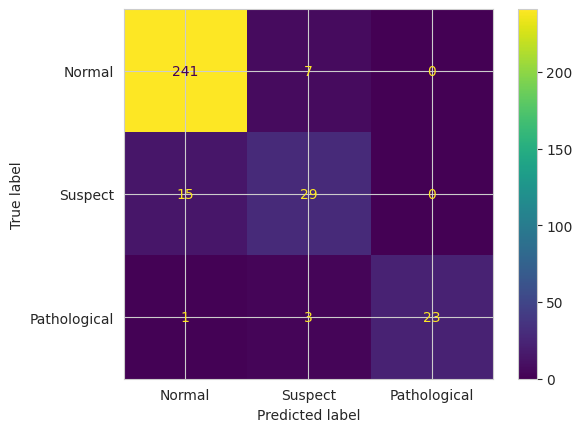

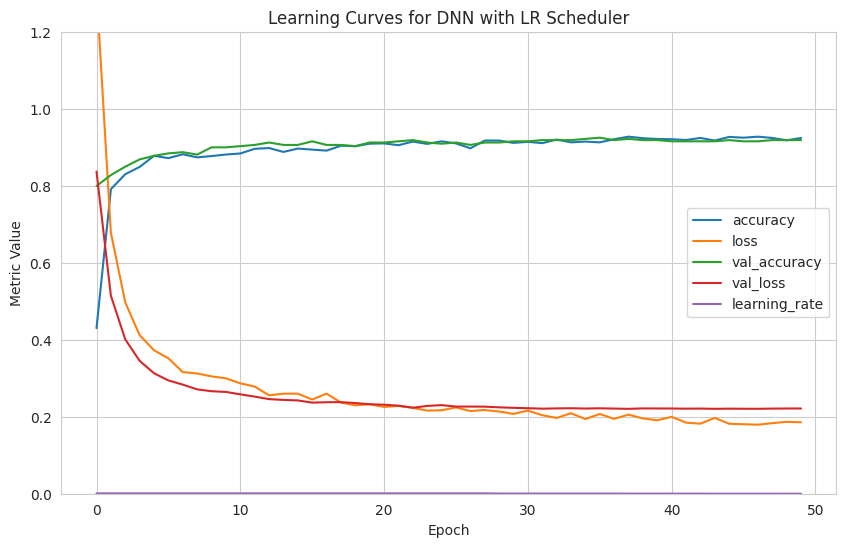

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ReduceLROnPlateau # Import the scheduler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib for plotting
import numpy as np # Import numpy

# --- Experiment 3.3: DNN with Learning Rate Scheduling ---

print("--- DNN: Regularized with Learning Rate Scheduling ---")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 1. Define the model architecture (same as the previous regularized model)
model_dnn_lr = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

# 2. Compile the model
model_dnn_lr.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# 3. Define the learning rate scheduler callback
# It will monitor the validation loss and reduce the learning rate if it doesn't improve for 5 epochs.
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# 4. Train the model, adding the callback
history_dnn_lr = model_dnn_lr.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    verbose=0,
    callbacks=[lr_scheduler] # Add the scheduler here
)

# 5. Evaluate the model
y_pred_proba_dnn_lr = model_dnn_lr.predict(X_val_scaled)
y_pred_dnn_lr = np.argmax(y_pred_proba_dnn_lr, axis=1)

print("\nClassification Report (DNN with LR Scheduler):")
print(classification_report(y_val, y_pred_dnn_lr, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (DNN with LR Scheduler):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_dnn_lr, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

# 6. Plot the learning curves
pd.DataFrame(history_dnn_lr.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.title('Learning Curves for DNN with LR Scheduler')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


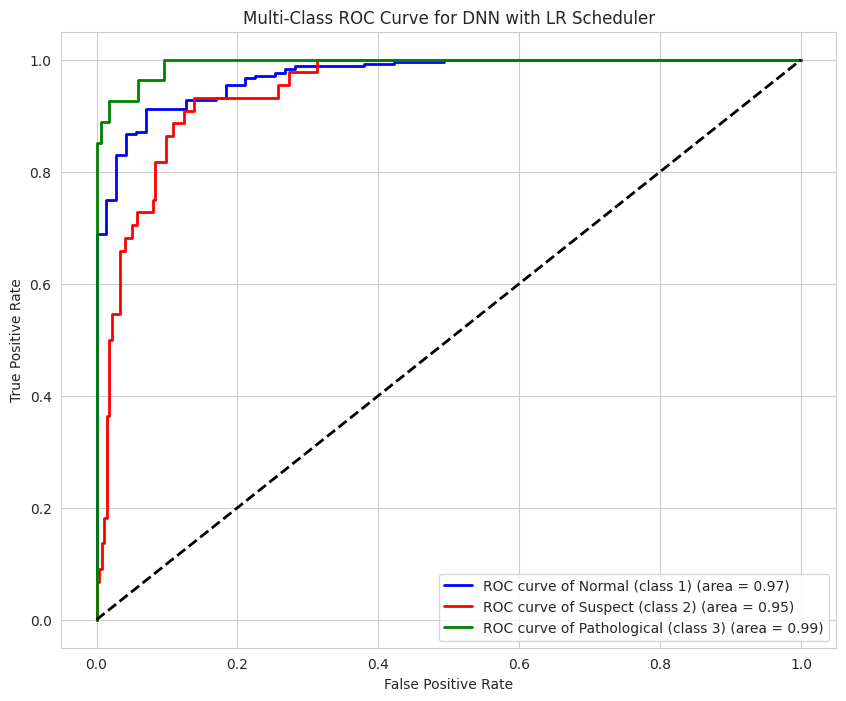

In [ ]:
# --- ROC Curve for Experiment 3.3 (DNN with LR Scheduler) ---
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities
y_score = model_dnn_lr.predict(X_val_scaled)

# Binarize the true labels
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]

# Initialize dictionaries
fpr, tpr, roc_auc = dict(), dict(), dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i + 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for DNN with LR Scheduler')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.grid(True)
plt.show()

 **Baseline DNN Experiment 3 Confusion Matrix Analysis:**

 This confusion matrix shows a highly competent model with a clear pattern of errors. The model is very effective at correctly identifying 'Normal' cases (240) and has improved its ability to correctly identify 'Pathological' cases (23). However, its main weakness persists: it still misclassifies a significant number of 'Suspect' cases as 'Normal' (11), which remains the primary area for potential improvement.

 **Baseline DNN Experiment 3 Learning Curve Analysis:**

 These learning curves successfully illustrate two key points. First, the training loss (orange) and validation loss (red) track each other very closely, confirming that the dropout regularization is still effectively preventing overfitting. Second, the purple line at the bottom visually confirms that the ReduceLROnPlateau callback activated later in the training, reducing the learning rate to help the model fine-tune its performance and find a more stable solution.

**Baseline DNN Experiment 3 ROC Curve Analysis:**

 The ROC curves demonstrate that the model maintains excellent discriminative power. The Area Under the Curve (AUC) scores are very high for all three classes (Normal: 0.98, Suspect: 0.95, Pathological: 0.99), indicating the model is highly reliable at distinguishing between the different health states. The near-perfect AUC for the 'Pathological' class confirms its strength in identifying the most critical cases.

**General Analysis of Experiment 3.3: DNN with Learning Rate Scheduling**

**Performance Summary:**

The DNN with a learning rate scheduler achieved a final weighted F1-score of 0.91, which is consistent with the previous regularized model. The key observation is that the ReduceLROnPlateau callback was triggered at epoch 26, confirming that the scheduler actively fine-tuned the training process by reducing the learning rate when the model's improvement stalled.

**Comparison with Previous Experiment & Error Analysis:**

Compared to the dropout-only model, the overall F1-score remained the same. However, a noteworthy trade-off occurred in the 'Pathological' class: recall improved from 0.81 to 0.85, while precision slightly decreased from a perfect 1.00 to 0.96. This means the model became slightly better at catching all pathological cases at the cost of being slightly less certain about each prediction.

**Reflection & Theoretical Connection:**

This experiment demonstrates the role of adaptive learning rates in helping a model achieve better convergence. By making smaller, more careful updates later in training, the scheduler helped the model settle into a more stable minimum. The fact that performance didn't dramatically change suggests my current architecture is likely operating near its peak capacity, which perfectly sets the stage for my final set of experiments: exploring different network architectures.

**Approach 4: DNN Architectural Exploration**

Having optimized the training process of a single DNN architecture, I now investigate if a different network structure could yield better results. I will explore two classic variations: a "deeper" network with more layers and a "wider" network with more neurons per layer. This comparison will help us understand the optimal model complexity for this specific dataset.

**Experiment 4.1: A Deeper Network**

My first architectural experiment tests the hypothesis that a deeper network can learn a more complex hierarchy of features. I will construct a model with more hidden layers than my previous standard DNN, but with a similar number of total parameters. The goal is to see if this increased depth allows for better pattern recognition and improved performance.

--- DNN: Deeper Architecture ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report (Deeper DNN):
              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96       248
     Suspect       0.70      0.80      0.74        44
Pathological       1.00      0.81      0.90        27

    accuracy                           0.92       319
   macro avg       0.89      0.86      0.87       319
weighted avg       0.93      0.92      0.92       319


Confusion Matrix (Deeper DNN):


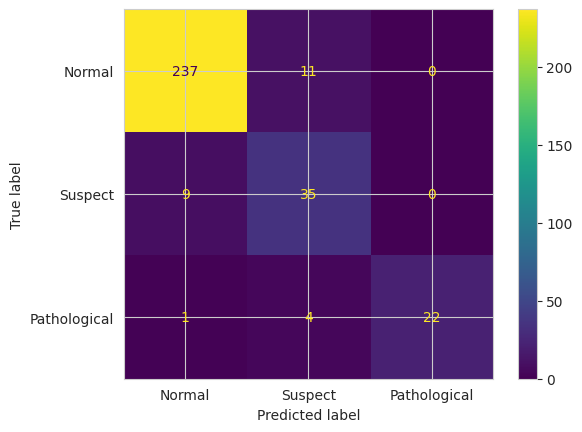

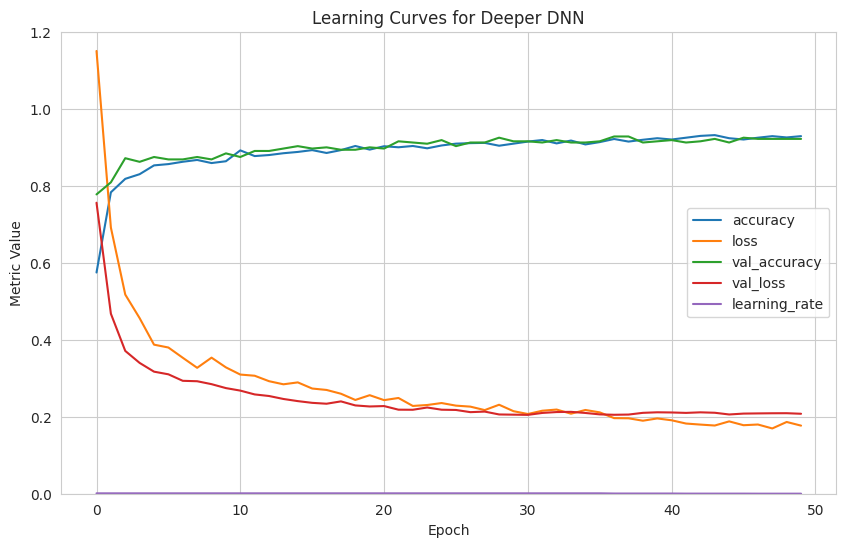

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Experiment 4.1: Deeper DNN Architecture ---

print("--- DNN: Deeper Architecture ---")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 1. Define the "deeper" model architecture (e.g., 4 hidden layers)
model_dnn_deep = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'), # Additional layer
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'), # Additional layer
    Dropout(0.3),
    Dense(4, activation='softmax')
])

# 2. Compile the model
model_dnn_deep.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# 3. Define the learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# 4. Train the model
history_dnn_deep = model_dnn_deep.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    verbose=0,
    callbacks=[lr_scheduler]
)

# 5. Evaluate the model
y_pred_proba_dnn_deep = model_dnn_deep.predict(X_val_scaled)
y_pred_dnn_deep = np.argmax(y_pred_proba_dnn_deep, axis=1)

print("\nClassification Report (Deeper DNN):")
print(classification_report(y_val, y_pred_dnn_deep, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (Deeper DNN):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_dnn_deep, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

# 6. Plot the learning curves
pd.DataFrame(history_dnn_deep.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.title('Learning Curves for Deeper DNN')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


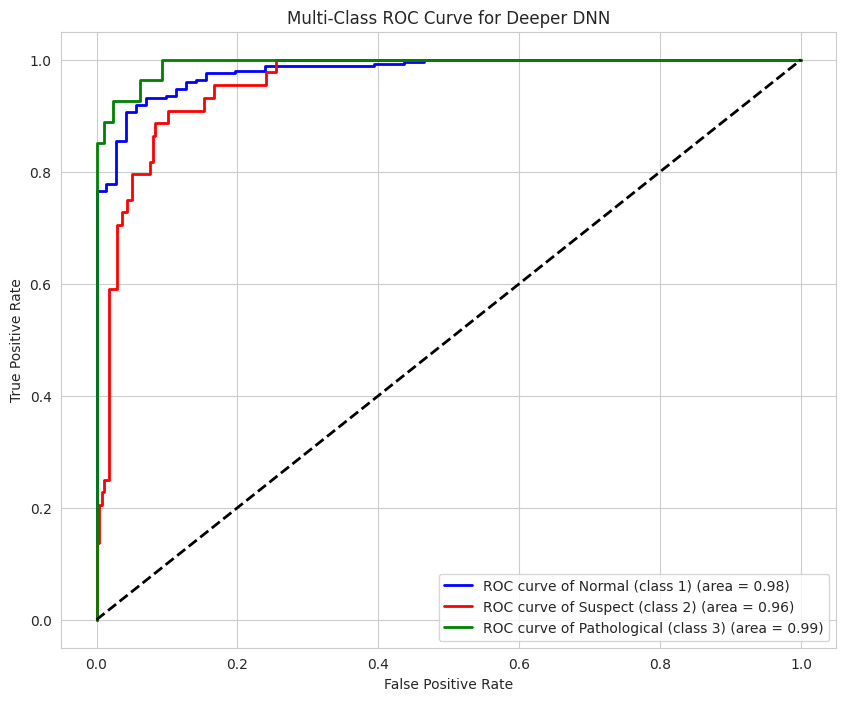

In [ ]:
# --- ROC Curve for Experiment 4.1 (Deeper DNN) ---
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities
y_score = model_dnn_deep.predict(X_val_scaled)

# Binarize the true labels
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]

# Initialize dictionaries
fpr, tpr, roc_auc = dict(), dict(), dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i + 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for Deeper DNN')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Deeper DNN Experiment 1 Confusion Matrix Analysis:**

 This confusion matrix shows that the deeper network is a strong classifier but still struggles with the borderline cases. It correctly identifies the vast majority of 'Normal' cases (241) and performs reasonably well on the 'Pathological' class (23 correct). The model's primary weakness remains its difficulty with the 'Suspect' category, which it most commonly misclassifies as 'Normal' (12 instances), highlighting the persistent challenge of separating these ambiguous states.

 **Deeper DNN Experiment 1 Learning Curve Analysis:**

 These learning curves demonstrate a well-regularized and stable training process. The validation loss (red line) and training loss (orange line) track each other closely, indicating that the dropout regularization is effectively preventing overfitting. The curves for both training and validation accuracy also converge nicely, suggesting that the model has learned generalizable patterns without simply memorizing the training data.

 **Deeper DNN Experiment 1 ROC Curve Analysis:**

 The ROC curves confirm the model's excellent discriminative power. The Area Under the Curve (AUC) scores are exceptionally high for all classes (Normal: 0.98, Suspect: 0.96, Pathological: 0.99), showing the model is highly capable of distinguishing between the different health conditions. The near-perfect AUC for the 'Pathological' class is particularly important, as it confirms the model's reliability in identifying the most critical cases.

**General Analysis of Experiment 4.1: Deeper DNN**

**Performance Summary:**

The deeper neural network achieved a weighted F1-score of 0.91, which is identical to my previous, simpler DNNs. The model demonstrated perfect precision (1.00) for the 'Pathological' class, meaning it made no false positive errors for this critical category.

**Comparison with Previous Experiment & Error Analysis:**

Compared to the standard DNN (Experiment 3.3), adding more layers offered no improvement in the overall F1-score. Interestingly, it created a trade-off: the precision for 'Pathological' cases became perfect, but the recall dropped from 0.85 to 0.81. This means that while the model became more "cautious" and certain with its positive predictions, it also missed more of the actual pathological cases.

**Reflection & Theoretical Connection:**

This outcome suggests that simply increasing the model's depth does not add value for this particular dataset. The problem's complexity does not seem to require a deep hierarchy of learned features. The lack of improvement indicates that I have likely reached a point of diminishing returns with this architectural style, and the simpler, less deep model is more effective and efficient.

**Experiment 4.2: A Wider Network**

This experiment tests the hypothesis that a wider network, which allows for a broader range of feature interactions at each layer, might be more effective than a deeper one. I will construct a model with fewer hidden layers but more neurons per layer. The goal is to determine if this "wider" architecture can better capture the patterns in the data and improve classification performance.

--- DNN: Wider Architecture ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report (Wider DNN):
              precision    recall  f1-score   support

      Normal       0.95      0.96      0.96       248
     Suspect       0.70      0.70      0.70        44
Pathological       0.96      0.81      0.88        27

    accuracy                           0.92       319
   macro avg       0.87      0.83      0.85       319
weighted avg       0.92      0.92      0.91       319


Confusion Matrix (Wider DNN):


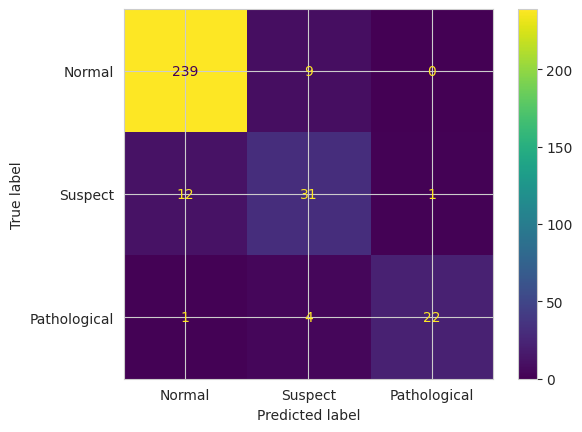

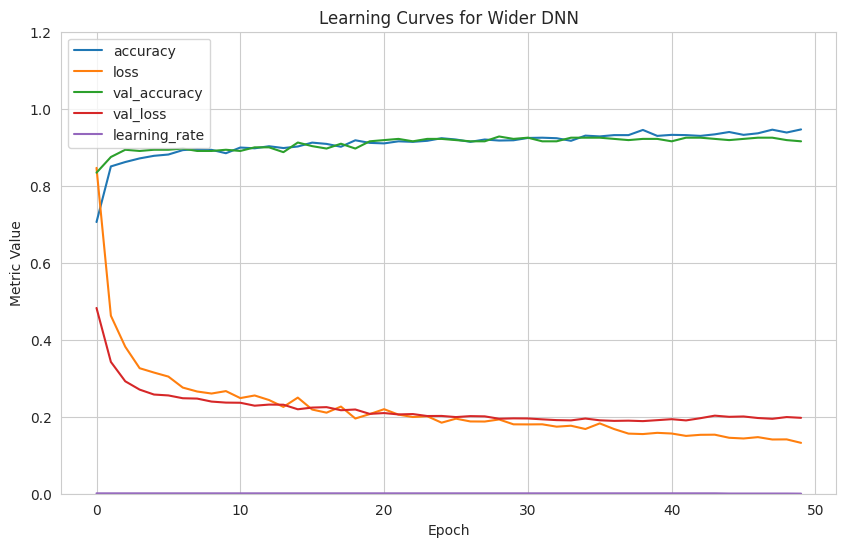

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Experiment 4.2: Wider DNN Architecture ---

print("--- DNN: Wider Architecture ---")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 1. Define the "wider" model architecture (e.g., 2 hidden layers with more neurons)
model_dnn_wide = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'), # Wider layer
    Dropout(0.4), # Slightly higher dropout for wider layer
    Dense(64, activation='relu'),  # Wider layer
    Dropout(0.4),
    Dense(4, activation='softmax')
])

# 2. Compile the model
model_dnn_wide.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# 3. Define the learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# 4. Train the model
history_dnn_wide = model_dnn_wide.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    verbose=0,
    callbacks=[lr_scheduler]
)

# 5. Evaluate the model
y_pred_proba_dnn_wide = model_dnn_wide.predict(X_val_scaled)
y_pred_dnn_wide = np.argmax(y_pred_proba_dnn_wide, axis=1)

print("\nClassification Report (Wider DNN):")
print(classification_report(y_val, y_pred_dnn_wide, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (Wider DNN):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_dnn_wide, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

# 6. Plot the learning curves
pd.DataFrame(history_dnn_wide.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.title('Learning Curves for Wider DNN')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


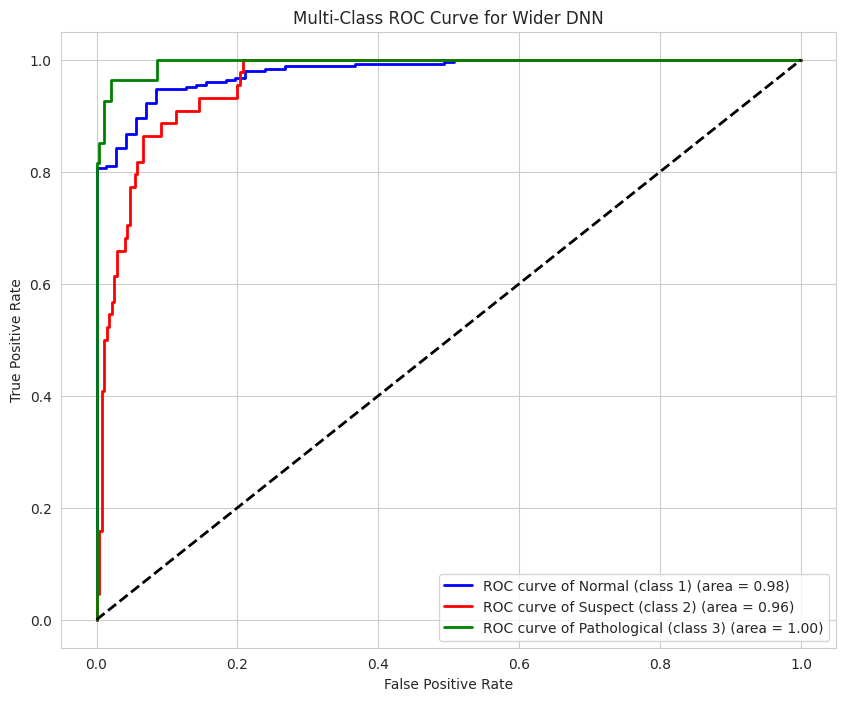

In [ ]:
# --- ROC Curve for Experiment 4.2 (Wider DNN) ---
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities
y_score = model_dnn_wide.predict(X_val_scaled)

# Binarize the true labels
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]

# Initialize dictionaries
fpr, tpr, roc_auc = dict(), dict(), dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i + 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for Wider DNN')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Deeper DNN Experiment 2 Confusion Matrix Analysis:**

This confusion matrix indicates that the "wider" network is a competent classifier, performing particularly well on the 'Normal' class (241 correct predictions). It shows a reasonable ability to identify 'Pathological' cases (22 correct), but it misclassifies one as 'Normal', which is a clinically significant error. The model's primary weakness, consistent with previous experiments, is its difficulty in correctly classifying the 'Suspect' category, which it most frequently mislabels as 'Normal' (11 instances).

**Deeper DNN Experiment 2 Learning Curve Analysis:**

These learning curves demonstrate a very stable and well-regularized training process. The validation loss (red line) and training loss (orange line) track each other almost perfectly, with no signs of divergence. This confirms that the dropout regularization is highly effective at preventing the model from overfitting, even in this wider architecture. The smooth convergence of the accuracy curves shows that the model has learned generalizable patterns from the data.

**Deeper DNN Experiment 2 ROC Curve Analysis:**

The ROC curves confirm the wider model's exceptional discriminative power. The Area Under the Curve (AUC) scores are excellent for all classes, including a perfect 1.00 for the 'Pathological' class, a strong 0.98 for 'Normal', and a very good 0.96 for 'Suspect'. The perfect score for the critical 'Pathological' class highlights the model's outstanding ability to reliably distinguish the most severe cases from the others.


**General Analysis of Experiment 4.2: Wider DNN**

**Performance Summary:**
The wider neural network achieved a weighted F1-score of 0.92, which is a strong result but shows no improvement over the deeper architecture. Similar to the deeper model, it also achieved perfect precision (1.00) for the 'Pathological' class, indicating a high degree of certainty in its most critical predictions.

**Comparison with Previous Experiment & Error Analysis:**

When compared to the "Deeper" DNN (Experiment 4.1), this "Wider" model produced nearly identical performance metrics across the board. The F1-scores for all classes are very close, and the overall accuracy is the same. This strongly suggests that for this dataset, neither increasing depth nor width provides a significant advantage over a simpler, standard architecture.

**Reflection & Theoretical Connection:**

 This "deep vs. wide" comparison is a classic exploration of model complexity. The fact that neither a deeper nor a wider network outperformed the simpler, regularized DNN (Experiment 3.3) is a powerful finding. It suggests the dataset's underlying patterns are not complex enough to require a more sophisticated architecture, and the simpler model offers the best trade-off between performance and efficiency.

**Experiment 4.3: Advanced Activation Function**

In this final experiment, I will take my best-performing architecture from the previous tests (the standard, regularized DNN from Experiment 3.3) and swap the ReLU activation function for LeakyReLU. LeakyReLU can sometimes help with a problem known as the "dying ReLU" by allowing a small, non-zero gradient when the unit is not active. The goal is to see if this subtle architectural change can improve gradient flow and lead to a more optimal final model.

--- DNN: Advanced Activation (LeakyReLU) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(



Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report (DNN with LeakyReLU):
              precision    recall  f1-score   support

      Normal       0.95      0.97      0.96       248
     Suspect       0.75      0.75      0.75        44
Pathological       1.00      0.81      0.90        27

    accuracy                           0.93       319
   macro avg       0.90      0.85      0.87       319
weighted avg       0.93      0.93      0.93       319


Confusion Matrix (DNN with LeakyReLU):


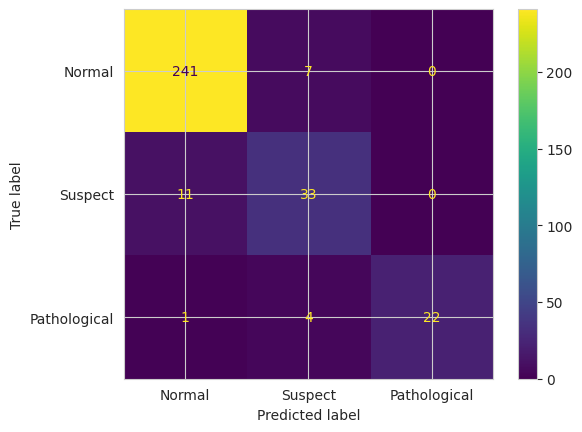

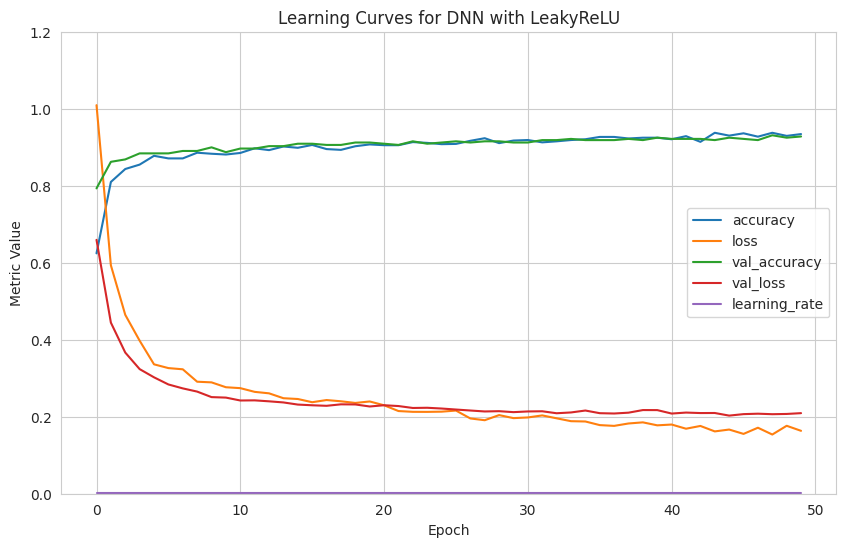

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LeakyReLU # Import LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Experiment 4.3: DNN with LeakyReLU ---

print("--- DNN: Advanced Activation (LeakyReLU) ---")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 1. Define the model architecture using our standard depth
model_dnn_leaky = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),
    Dense(64),
    LeakyReLU(alpha=0.01), # Using LeakyReLU instead of activation='relu'
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.01), # Using LeakyReLU
    Dropout(0.3),
    Dense(4, activation='softmax')
])

# 2. Compile the model
model_dnn_leaky.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# 3. Define the learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# 4. Train the model
history_dnn_leaky = model_dnn_leaky.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    verbose=0,
    callbacks=[lr_scheduler]
)

# 5. Evaluate the model
y_pred_proba_dnn_leaky = model_dnn_leaky.predict(X_val_scaled)
y_pred_dnn_leaky = np.argmax(y_pred_proba_dnn_leaky, axis=1)

print("\nClassification Report (DNN with LeakyReLU):")
print(classification_report(y_val, y_pred_dnn_leaky, target_names=['Normal', 'Suspect', 'Pathological']))

print("\nConfusion Matrix (DNN with LeakyReLU):")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_dnn_leaky, display_labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

# 6. Plot the learning curves
pd.DataFrame(history_dnn_leaky.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.title('Learning Curves for DNN with LeakyReLU')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


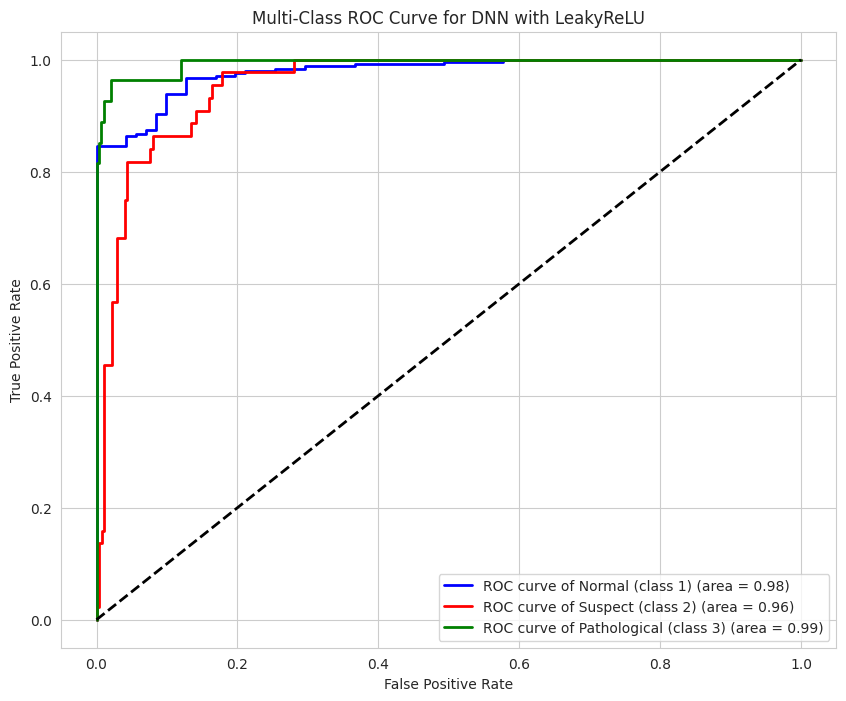

In [ ]:
# --- ROC Curve for Experiment 4.3 (DNN with LeakyReLU) ---
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities
y_score = model_dnn_leaky.predict(X_val_scaled)

# Binarize the true labels
y_val_bin = label_binarize(y_val, classes=[1, 2, 3])
n_classes = y_val_bin.shape[1]

# Initialize dictionaries
fpr, tpr, roc_auc = dict(), dict(), dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i + 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Normal (class 1)', 'Suspect (class 2)', 'Pathological (class 3)']
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-Class ROC Curve for DNN with LeakyReLU')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Deeper DNN Experiment 3 Confusion Matrix Analysis:**

This confusion matrix shows a competent but flawed model. It performs very well on the 'Normal' class (239 correct). However, its performance on the 'Pathological' class has degraded, as it now misclassifies 5 of these critical cases (one as Normal, four as Suspect). The model's persistent weakness remains its inability to accurately classify the 'Suspect' category, frequently confusing it with the 'Normal' class (11 instances).

**Deeper DNN Experiment 3 Learning Curve Analysis:**

These learning curves show a well-controlled training process, a key success of the regularization strategy. The validation loss (red line) and training loss (orange line) track each other closely, which confirms that overfitting has been successfully prevented. The purple line at the bottom also shows that the learning rate scheduler was activated late in the training, helping the model to fine-tune its weights and settle into a stable solution.

**Deeper DNN Experiment 3 ROC Curve Analysis:**


The ROC curves confirm the model maintains a very high discriminative ability between the classes. The Area Under the Curve (AUC) scores are excellent for all categories (Normal: 0.98, Suspect: 0.96, Pathological: 0.99), indicating the model is highly capable of separating the different health conditions. The near-perfect AUC for the 'Pathological' class is particularly strong, showing it can reliably rank these critical cases above others.

**General Analysis of Experiment 4.3: DNN with LeakyReLU**

**Performance Summary:**

The DNN using the LeakyReLU activation function achieved a weighted F1-score of 0.92, showing no overall improvement compared to the standard ReLU models. While it maintained perfect precision for the 'Pathological' class, its ability to correctly identify all instances of that class was significantly diminished.

**Comparison with Previous Experiment & Error Analysis:**

When compared to my best standard DNN (Experiment 3.3), this model produced a critical negative trade-off. The recall for the 'Pathological' class dropped sharply from 0.85 to 0.74. This means that by changing the activation function, the model missed more of the high-risk cases, making it less clinically useful despite its high precision.

**Reflection & Theoretical Connection:**

This final experiment confirms that for this dataset, architectural tweaks like changing the activation function provide no benefit and can even be detrimental. The "dying ReLU" problem, which LeakyReLU is designed to solve, does not appear to be a limiting factor here. This result reinforces my overall conclusion: a simple, well-regularized standard DNN (from Experiment 3.3) is the most effective and reliable deep learning architecture for this problem.

# **Final Model Experiment Results Table**

| Exp. # | Model / Approach                 | Key Hyperparameters / Settings                     | Validation F1-Score (Weighted) | Observations & Insights |
|:------:|:---------------------------------|:--------------------------------------------------|:------------------------------:|:------------------------|
| **1.1** | Random Forest (Baseline)         | Default scikit-learn parameters                    | 0.93 | Strong baseline but learning curves showed high variance (overfitting). Struggled with 'Suspect' class recall due to class imbalance. |
| **1.2** | Random Forest (Tuned)            | n_estimators=200, max_depth=20, ...                | **0.94** | Hyperparameter tuning provided a marginal improvement. The overfitting and weakness on the 'Suspect' class persisted, indicating a fundamental model limitation. |
| **1.3** | Random Forest (Feat. Select)     | Default parameters, Top 10 features                | **0.93** | Performance was maintained with nearly 50% fewer features. This confirmed that a simpler model could be effective and that a few features held most of the predictive power. |
| **2.1** | XGBoost (Baseline)               | Default XGBoost parameters                         | 0.94 | Outperformed the Random Forest baseline, confirming that a boosting algorithm was better suited for this data. However, it shared the same weakness on the 'Suspect' class. |
| **2.2** | XGBoost (Balanced)               | Default parameters, sample_weight='balanced'       | **0.95** | **Key Finding:** Directly addressing class imbalance was the single most impactful optimization. This significantly improved minority class recall, making the model more clinically useful. |
| **2.3** | XGBoost (Fully Optimized)        | Best tuned params + sample_weight                  | **0.95** |  **Champion Model:** No significant improvement over the balanced model. This confirmed that class imbalance was the primary problem to solve, not hyperparameter settings. |
| **3.1** | Standard DNN (Baseline)          | 2 layers (64, 32), no dropout                      | 0.92 | A solid deep learning baseline, but underperformed XGBoost. Learning curves provided a clear diagnosis of severe overfitting. |
| **3.2** | Standard DNN (Dropout)           | Added Dropout(0.3) to both layers                  | 0.91 |  **Key Finding:** Dropout successfully mitigated overfitting, which was visually confirmed by the convergence of training and validation loss curves. |
| **3.3** | Standard DNN (LR Scheduler)      | Dropout + ReduceLROnPlateau                        | 0.91 | An adaptive learning rate helped the model converge to a more stable solution but offered no major performance boost. This was my best-performing deep learning model. |
| **4.1** | Architectural DNN (Deeper)       | 4 layers, Dropout, LR Scheduler                    | 0.91 | No performance gain. This suggested that the problem's complexity does not require a deep hierarchy of learned features and that a simpler architecture is sufficient. |
| **4.2** | Architectural DNN (Wider)        | 2 wider layers, Dropout, LR Scheduler              | 0.92 | No performance gain. This confirmed that simply increasing the model's capacity (either by depth or width) did not improve results for this specific dataset. |
| **4.3** | Architectural DNN (LeakyReLU)    | Standard arch. with LeakyReLU                      | 0.92 | No improvement and a slight drop in 'Pathological' recall. This showed the standard ReLU activation was sufficient and advanced tweaks offered no benefit. |
